# **Heart Disease Prediction**

## **Exploratory Data Analysis (EDA)**
This notebook focuses on performing a detailed exploratory data analysis (EDA) to characterize the dataset and gain deeper insights into its structure and attributes. The goal is to identify potential data preparation steps, feature engineering needs, and the feasibility of implementing a heuristic model for the Heart Disease Project.

The insights gained from this analysis will be fundamental for data preprocessing and model development in the next steps of the project.

`Simón Correa Marín`


### **1. Import Libraries and Configurations**

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow as pa
import matplotlib.pyplot as plt

In [2]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.12.9 (v3.12.9:fdb81425a9a, Feb  4 2025, 12:21:36) [Clang 13.0.0 (clang-1300.0.29.30)]
Pandas version:  2.2.3


### **2. Load Data**

In [4]:
DATA_DIR = Path.cwd().resolve().parents[0] / "data"

hd_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/hd_type_fixed.parquet", engine="pyarrow"
)

### **3. Data Description**

In [5]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6848 entries, 0 to 6847
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rest_ecg    6392 non-null   category
 1   ca          6479 non-null   float64 
 2   thal        6552 non-null   category
 3   max_hr      6453 non-null   float64 
 4   exang       6848 non-null   bool    
 5   old_peak    6763 non-null   float64 
 6   chol        6643 non-null   float64 
 7   rest_bp     6655 non-null   float64 
 8   chest_pain  6648 non-null   category
 9   disease     6848 non-null   bool    
 10  sex         6692 non-null   category
 11  fbs         6848 non-null   bool    
 12  slope       6492 non-null   float64 
 13  age         6763 non-null   float64 
dtypes: bool(3), category(4), float64(7)
memory usage: 422.0 KB


In [6]:
# Convert columns to categorical again 
categorical_cols = ["chest_pain", "slope", "ca", "rest_ecg", "thal", "sex"]

# Categorical
hd_df[categorical_cols] = hd_df[categorical_cols].astype("category")

In [7]:
hd_df.shape

(6848, 14)

In [8]:
hd_df.sample(3)

rest_ecg   ca        thal  max_hr  exang  old_peak  \
737                          normal 0.00      normal  162.00  False     50.00   
5002  left ventricular hypertrophy  2.00      normal  152.00  False     58.00   
5932  left ventricular hypertrophy  3.00  reversable  146.00  False     69.00   

       chol  rest_bp  chest_pain  disease     sex    fbs slope   age  
737  244.00   120.00  nontypical    False  Female  False  1.00 50.00  
5002 319.00   136.00  nontypical     True  Female   True  1.00 58.00  
5932 254.00   140.00  nonanginal     True    Male  False  2.00 69.00

In [9]:
# Number of missing values
hd_df.isnull().sum()

rest_ecg      456
ca            369
thal          296
max_hr        395
exang           0
old_peak       85
chol          205
rest_bp       193
chest_pain    200
disease         0
sex           156
fbs             0
slope         356
age            85
dtype: int64

**Target =** Disease

#### **Numerical Variables**

In [10]:
hd_df.describe()

max_hr  old_peak    chol  rest_bp     age
count 6453.00   6763.00 6643.00  6655.00 6763.00
mean   149.81     54.43  246.34   131.70   54.43
std     22.71      9.00   50.07    17.55    9.00
min     71.00     29.00  126.00    94.00   29.00
25%    134.00     48.00  212.00   120.00   48.00
50%    153.00     56.00  241.00   130.00   56.00
75%    166.00     61.00  275.00   140.00   61.00
max    202.00     77.00  564.00   200.00   77.00

#### **Categorical Variables**

In [11]:
# categorical columns description
hd_df.describe(include="category")

rest_ecg      ca    thal    chest_pain   sex  \
count                            6392 6479.00    6552          6648  6692   
unique                              3    4.00       3             4     2   
top     left ventricular hypertrophy     0.00  normal  asymptomatic  Male   
freq                             3172 3815.00    3640          3156  4546   

         slope  
count  6492.00  
unique    3.00  
top       1.00  
freq   3038.00

#### **Boolean Variables**

In [12]:
# boolean columns description
hd_df.describe(include="boolean")

exang disease    fbs
count    6848    6848   6848
unique      2       2      2
top     False   False  False
freq     4362    3570   5637

### **4. Univariate Analysis**

#### **Target Variable**

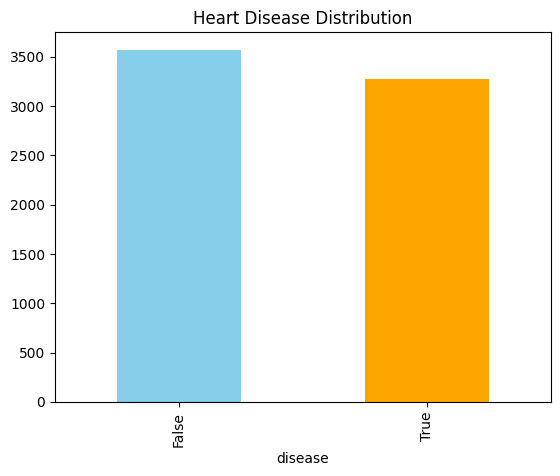

In [13]:
hd_df["disease"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Heart Disease Distribution"
);

#### **Numerical Variables**

In [14]:
# list of the numerical columns
numerical_columns = list(hd_df.select_dtypes(include=["number"]).columns)
numerical_columns


['max_hr', 'old_peak', 'chol', 'rest_bp', 'age']

In [15]:
def univariate_analysis_num(column, hist_bins):
    """
    Function to plot univariate analysis for numerical columns
    """

    # Statistics
    stats = hd_df[column].describe().to_frame()
    unique_values = pd.DataFrame({"Unique Values": [hd_df[column].nunique()]})
    missing_values = pd.DataFrame({"Missing Values": [hd_df[column].isnull().sum()]})

    # Display tables properly formatted
    display(stats)
    display(unique_values)
    display(missing_values)

    # Title
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(hd_df[column], bins=hist_bins, edgecolor="black")
    plt.title("Histogram")

    # Density plot
    plt.subplot(1, 3, 2)
    hd_df[column].plot(kind="density")
    plt.title("Density Plot")

    # Boxplot
    plt.subplot(1, 3, 3)
    hd_df[column].plot(kind="box")
    plt.title("Boxplot")

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


**max_hr**

max_hr
count 6453.00
mean   149.81
std     22.71
min     71.00
25%    134.00
50%    153.00
75%    166.00
max    202.00

Unique Values
0             91

Missing Values
0             395

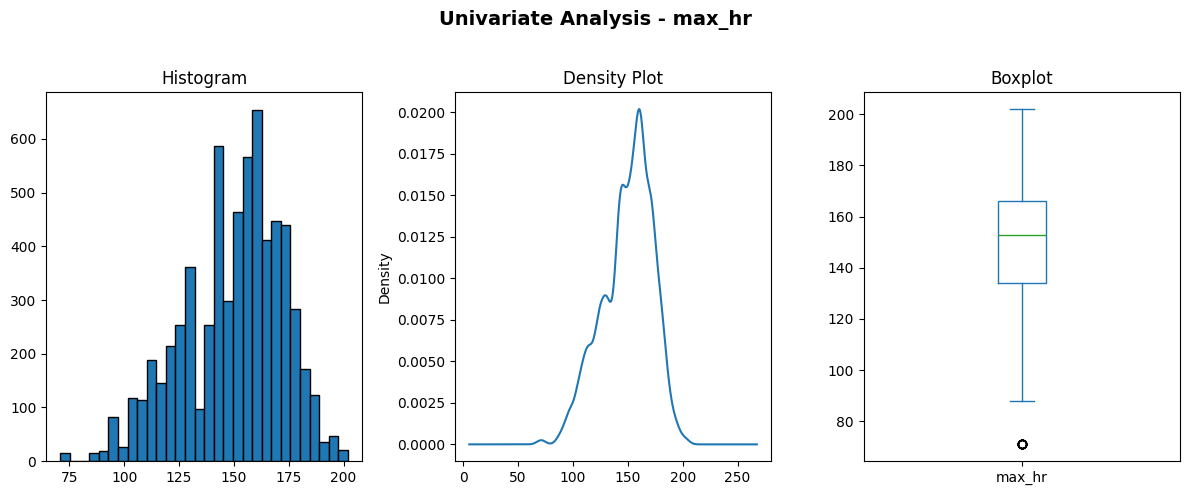

In [16]:
univariate_analysis_num("max_hr", 30)

**old_peak**

old_peak
count   6763.00
mean      54.43
std        9.00
min       29.00
25%       48.00
50%       56.00
75%       61.00
max       77.00

Unique Values
0             41

Missing Values
0              85

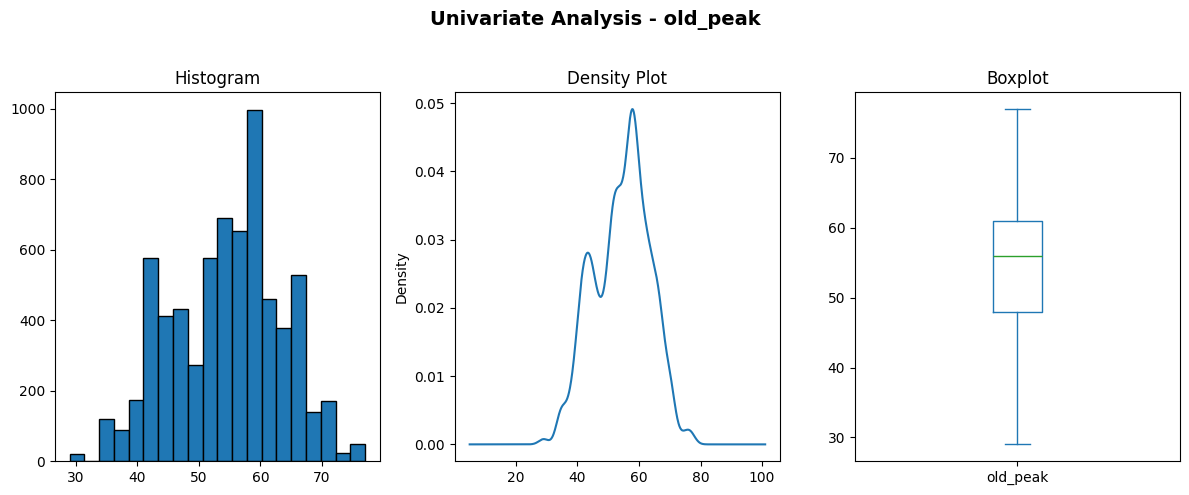

In [17]:
univariate_analysis_num("old_peak", 20)

**chol**

chol
count 6643.00
mean   246.34
std     50.07
min    126.00
25%    212.00
50%    241.00
75%    275.00
max    564.00

Unique Values
0            152

Missing Values
0             205

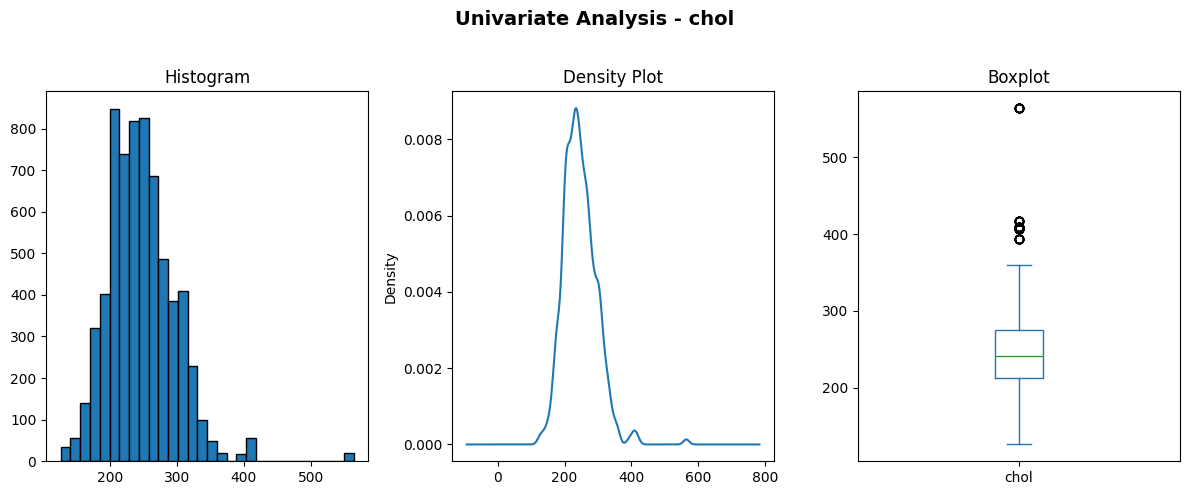

In [18]:
univariate_analysis_num("chol", 30)

**rest_bp**

rest_bp
count  6655.00
mean    131.70
std      17.55
min      94.00
25%     120.00
50%     130.00
75%     140.00
max     200.00

Unique Values
0             50

Missing Values
0             193

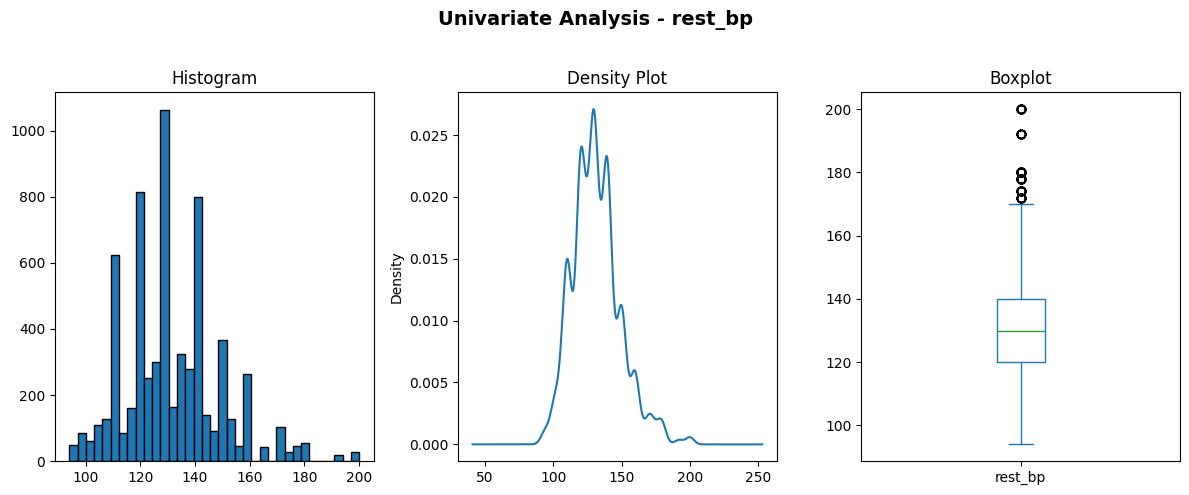

In [19]:
univariate_analysis_num("rest_bp", 35)

**age**

age
count 6763.00
mean    54.43
std      9.00
min     29.00
25%     48.00
50%     56.00
75%     61.00
max     77.00

Unique Values
0             41

Missing Values
0              85

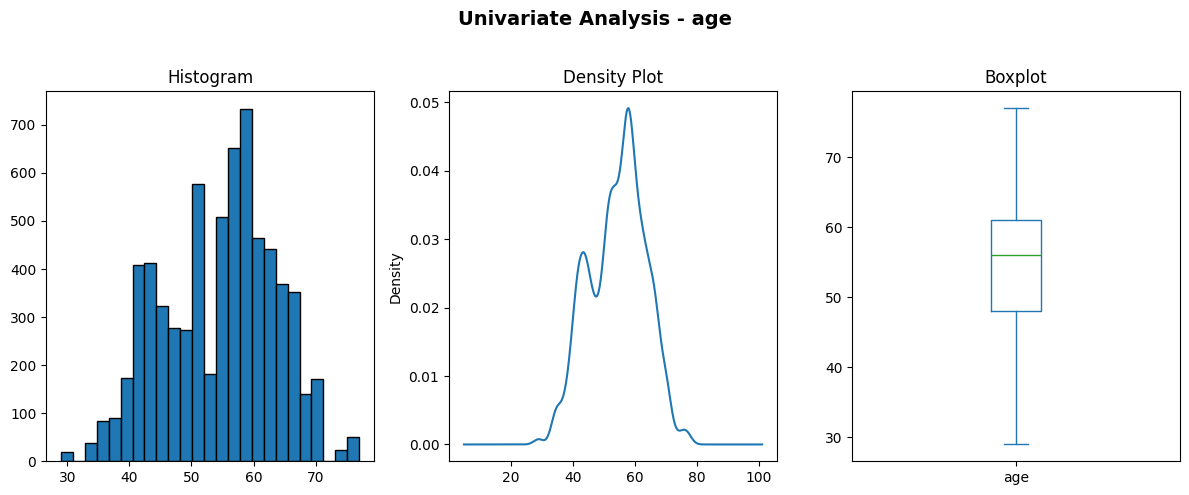

In [20]:
univariate_analysis_num("age", 25)

#### **Categorical and Boolean Variables**

In [21]:
# list of the categorical columns
categorical_columns = list(hd_df.select_dtypes(include=["category", "boolean"]).columns)
categorical_columns


['rest_ecg',
 'ca',
 'thal',
 'exang',
 'chest_pain',
 'disease',
 'sex',
 'fbs',
 'slope']

In [22]:
def univariate_analysis_cat(column):
    """
    Function to plot univariate analysis for categorical columns
    """

    # Statistics
    stats = hd_df[column].describe().to_frame() # Convert stats to DataFrame
    unique_values = pd.DataFrame({"Unique Values": [hd_df[column].nunique()]})
    missing_values = pd.DataFrame({"Missing Values": [hd_df[column].isnull().sum()]})
    freq_table = hd_df[column].value_counts().to_frame().reset_index()
    freq_table.columns = [column, "Count"]  # Rename columns for clarity

    # Display tables properly formatted
    display(stats)
    display(unique_values)
    display(missing_values)
    display(freq_table)

    # Title
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Bar plot
    plt.bar(hd_df[column].value_counts().index, hd_df[column].value_counts().values, 
            color=["skyblue", "orange", "green"])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Value Counts")

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


**rest_ecg**

rest_ecg
count                            6392
unique                              3
top     left ventricular hypertrophy 
freq                             3172

Unique Values
0              3

Missing Values
0             456

rest_ecg  Count
0  left ventricular hypertrophy    3172
1                         normal   3143
2          ST-T wave abnormality     77

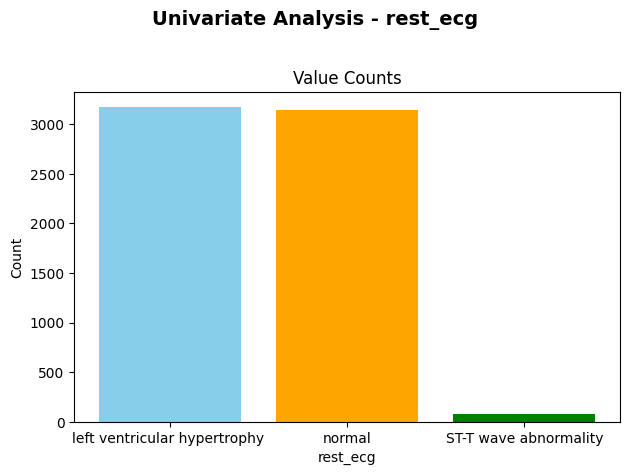

In [23]:
univariate_analysis_cat("rest_ecg")

**ca**

ca
count  6479.00
unique    4.00
top       0.00
freq   3815.00

Unique Values
0              4

Missing Values
0             369

ca  Count
0 0.00   3815
1 1.00   1436
2 2.00    789
3 3.00    439

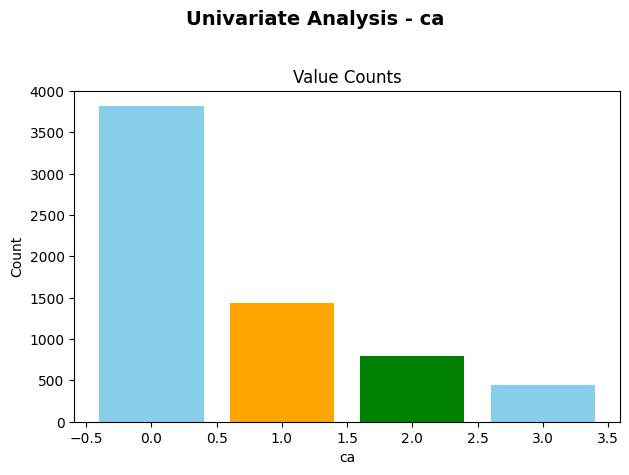

In [24]:
univariate_analysis_cat("ca")

**thal**

thal
count     6552
unique       3
top     normal
freq      3640

Unique Values
0              3

Missing Values
0             296

thal  Count
0      normal   3640
1  reversable   2507
2       fixed    405

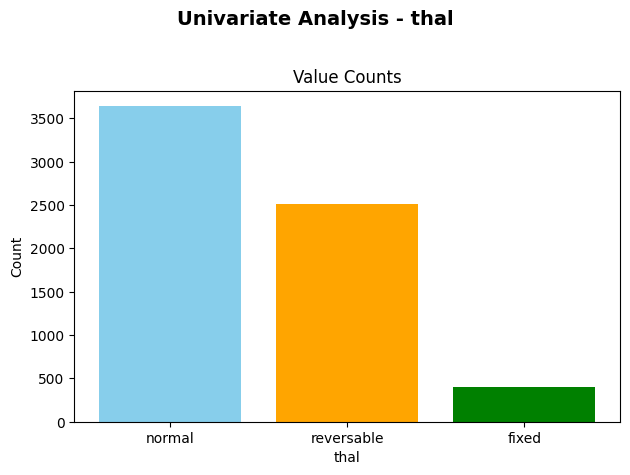

In [25]:
univariate_analysis_cat("thal")

**exang**

exang
count    6848
unique      2
top     False
freq     4362

Unique Values
0              2

Missing Values
0               0

exang  Count
0  False   4362
1   True   2486

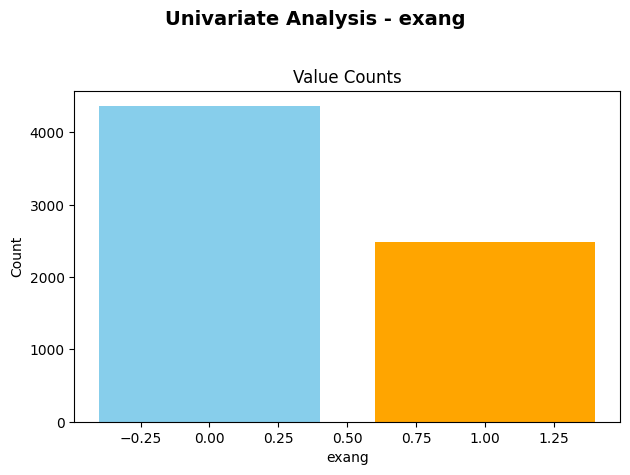

In [26]:
univariate_analysis_cat("exang")

**chest_pain**

chest_pain
count           6648
unique             4
top     asymptomatic
freq            3156

Unique Values
0              4

Missing Values
0             200

chest_pain  Count
0  asymptomatic   3156
1    nonanginal   1917
2    nontypical   1064
3       typical    511

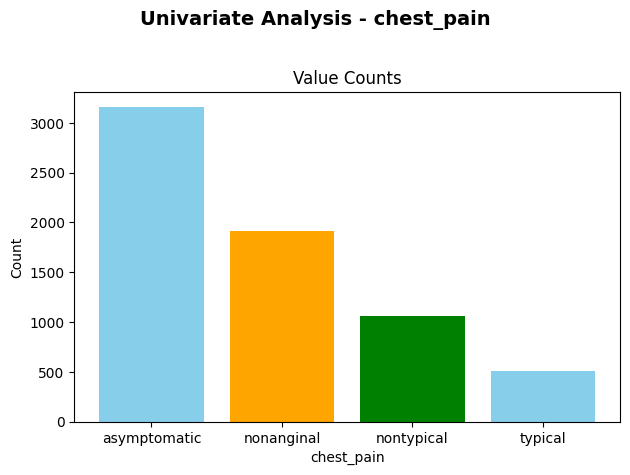

In [27]:
univariate_analysis_cat("chest_pain")

**sex**

sex
count   6692
unique     2
top     Male
freq    4546

Unique Values
0              2

Missing Values
0             156

sex  Count
0    Male   4546
1  Female   2146

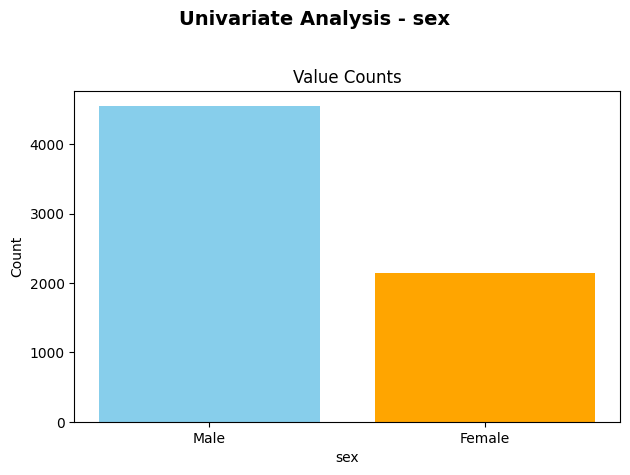

In [28]:
univariate_analysis_cat("sex")

**fbs**

fbs
count    6848
unique      2
top     False
freq     5637

Unique Values
0              2

Missing Values
0               0

fbs  Count
0  False   5637
1   True   1211

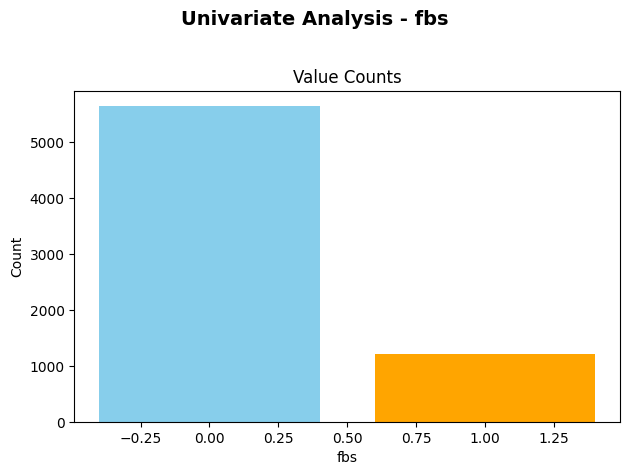

In [29]:
univariate_analysis_cat("fbs")

**slope**

slope
count  6492.00
unique    3.00
top       1.00
freq   3038.00

Unique Values
0              3

Missing Values
0             356

slope  Count
0  1.00   3038
1  2.00   2972
2  3.00    482

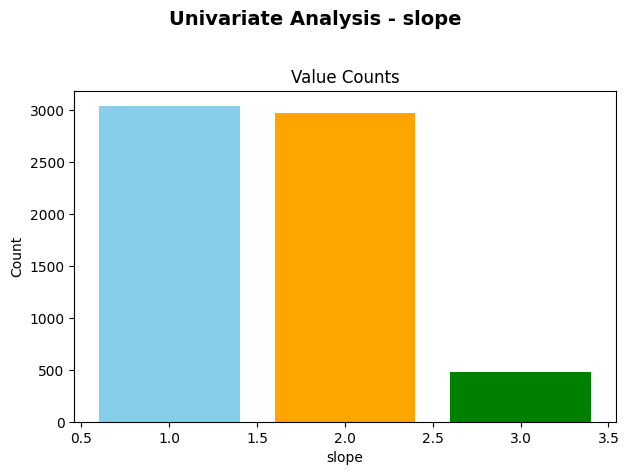

In [30]:
univariate_analysis_cat("slope")

**disease**

disease
count     6848
unique       2
top      False
freq      3570

Unique Values
0              2

Missing Values
0               0

disease  Count
0    False   3570
1     True   3278

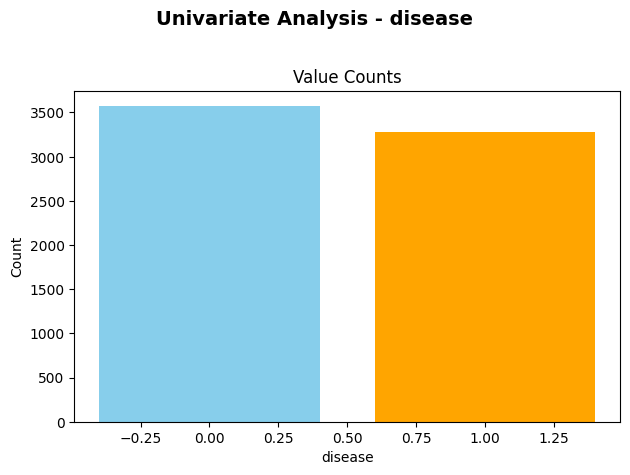

In [31]:
univariate_analysis_cat("disease")

### **5. Bivariate Analysis**

Relationships between the target variables and the features.

#### **Target vs Numerical Variables**

In [32]:
def bivariate_analysis_num(column):
    """
    Function to plot bivariate analysis for numerical columns
    """

    # Title
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Disease vs {column}", fontsize=14, fontweight="bold")

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x="disease", y=column, data=hd_df)
    plt.title("Boxplot")

    # Density plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(hd_df[hd_df["disease"] == 1][column], label="Has disease", fill=True)
    sns.kdeplot(hd_df[hd_df["disease"] == 0][column], label="Has not disease", fill=True)
    plt.title("Density Plot")
    plt.legend(fontsize=8)

    # Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(hd_df, x=column, hue="disease", kde=True, bins=20)
    plt.title("Histogram")

    # Visualizations
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None

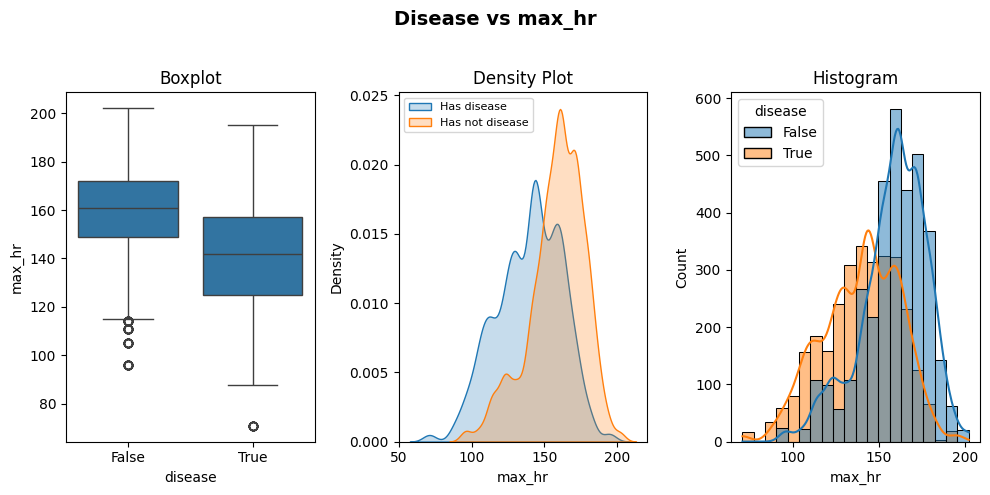

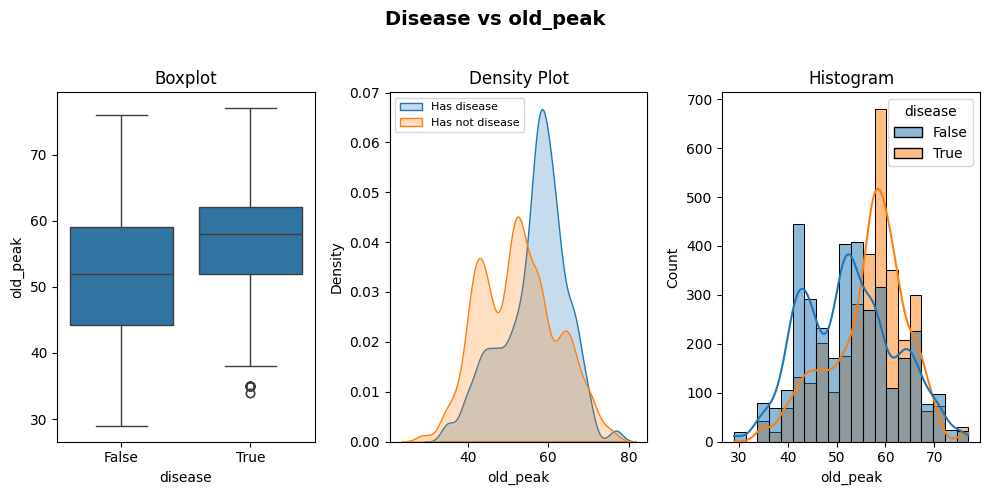

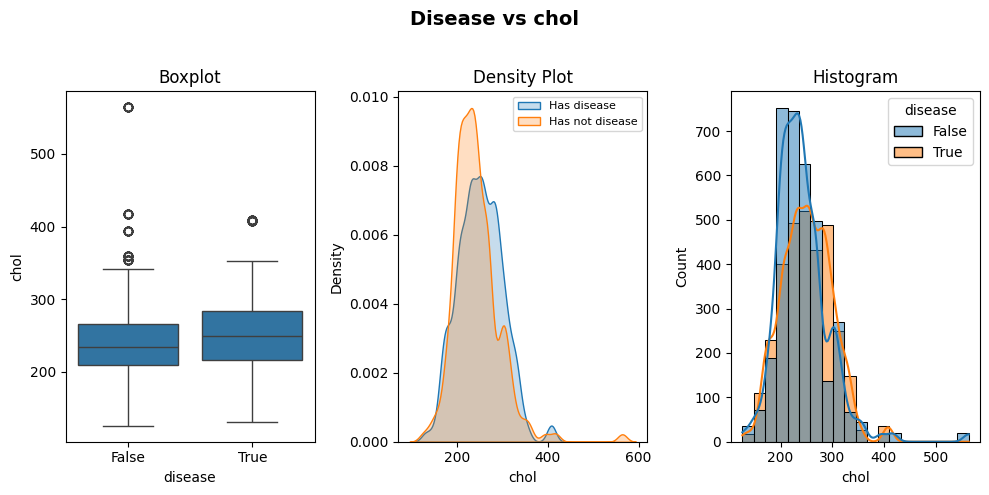

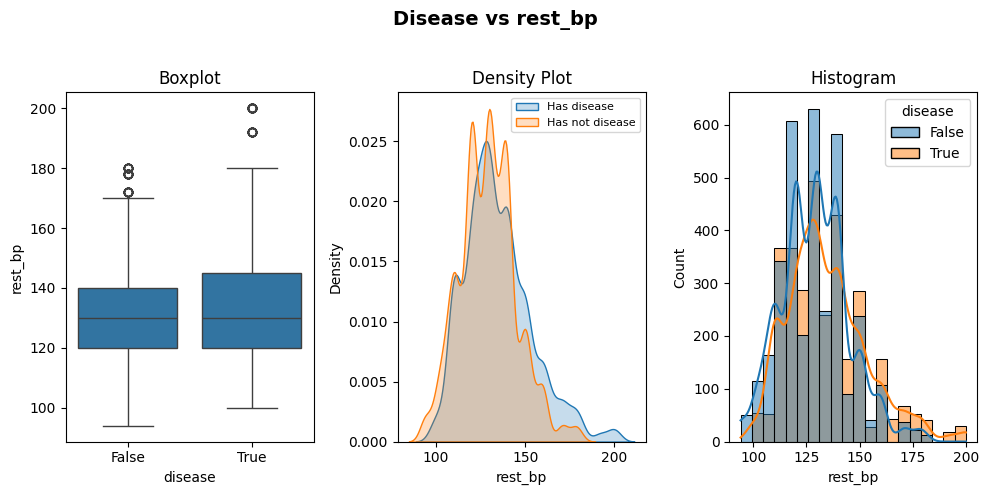

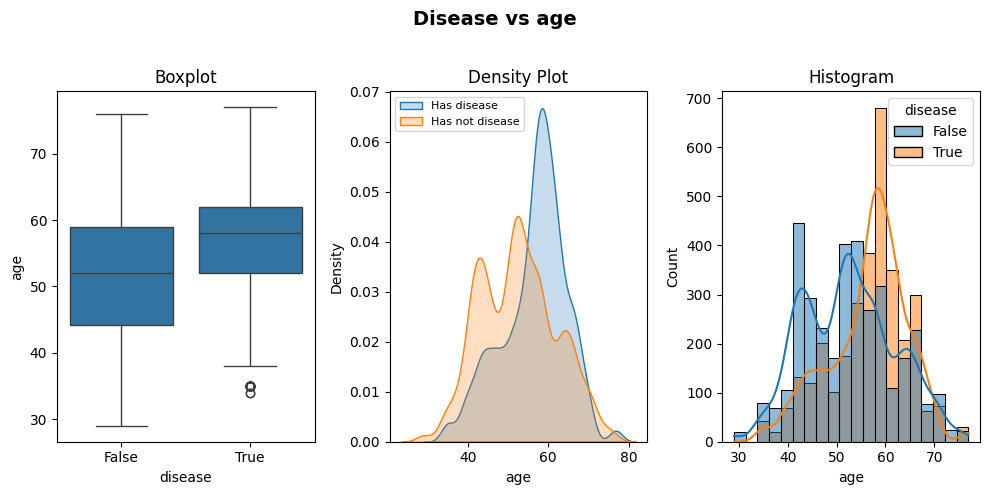

In [33]:
# Bivariate analysis for numerical columns
for col in numerical_columns:
    bivariate_analysis_num(col)

#### **Target vs Categorical Variables**

In [34]:
def bivariate_analysis_cat(column):
    """
    Function to plot bivariate analysis for categorical columns
    """

    # Crosstab table 
    crosstab_table = pd.crosstab(hd_df[column], hd_df["disease"], margins=True)
    display(crosstab_table.style.background_gradient(cmap="coolwarm").set_caption(f"Crosstab: Disease vs {column}"))

    # Percentage of cases with disease for each category
    disease_percentage = hd_df.groupby(column, observed=True)["disease"].mean() * 100
    disease_percentage_df = disease_percentage.to_frame(name="Percentage with Disease")
    display(disease_percentage_df.style.format("{:.2f}%").set_caption(f"Percentage of Cases with Disease by {column}"))

    # Title
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Disease vs {column}", fontsize=14, fontweight="bold")

    # Stacked Barplot
    plt.subplot(1, 2, 1)
    crosstab_table.iloc[:-1, :].plot(kind="bar", stacked=True, colormap="coolwarm", ax=plt.gca())  # Exclude 'All' row
    plt.title("Stacked Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Regular Barplot
    plt.subplot(1, 2, 2)
    crosstab_table.iloc[:-1, :].plot(kind="bar", colormap="viridis", ax=plt.gca())  # Exclude 'All' row
    plt.title("Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


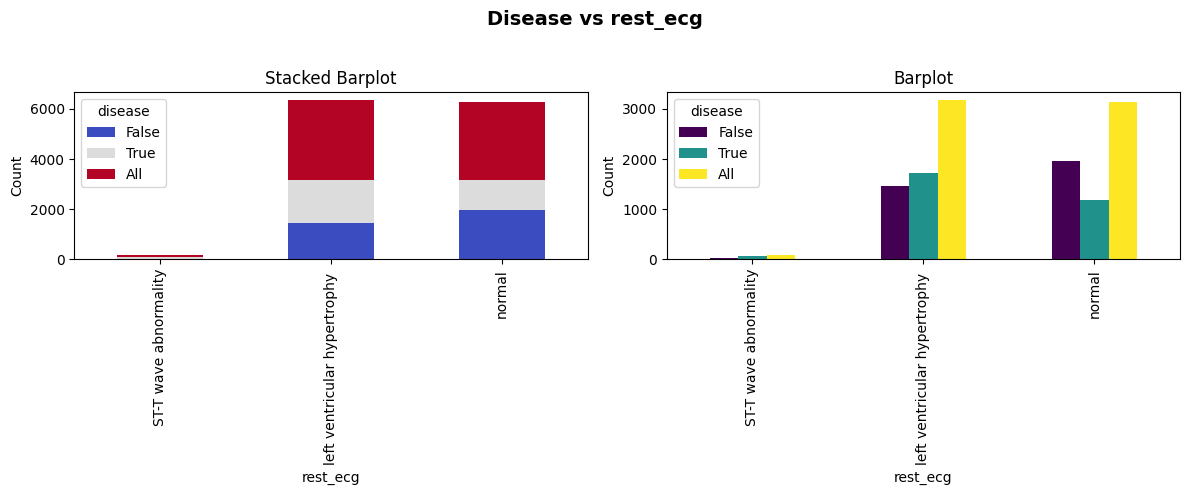

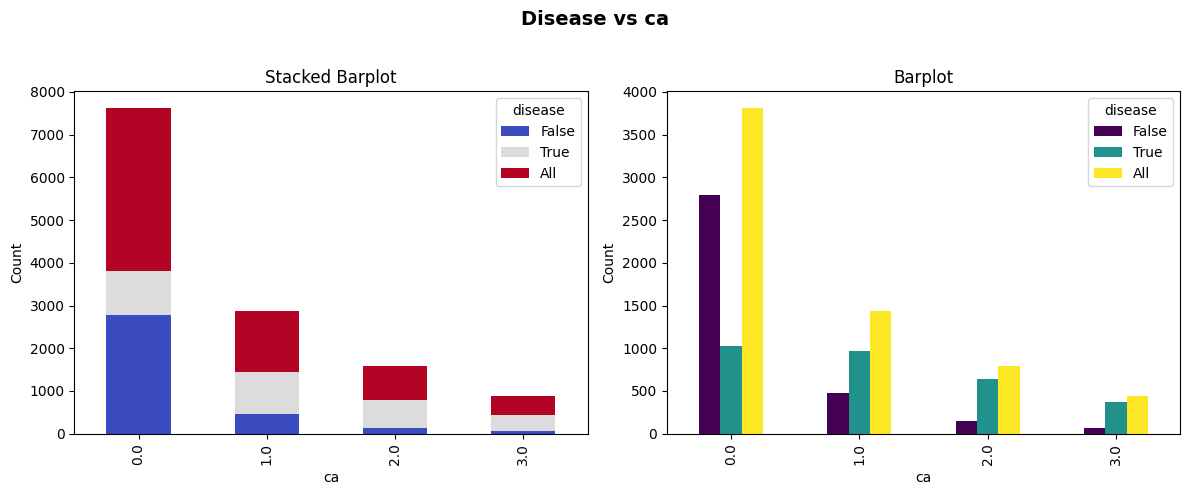

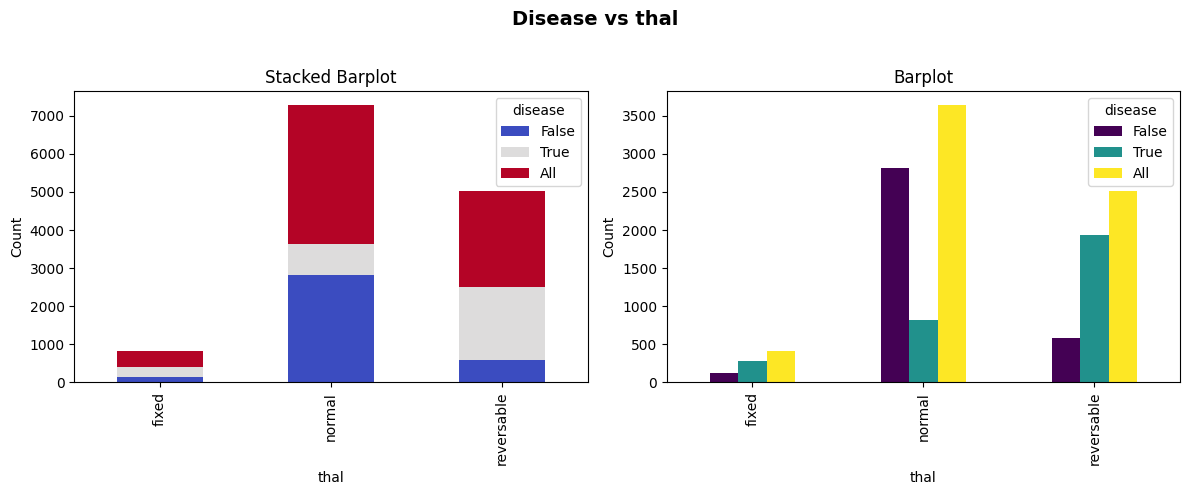

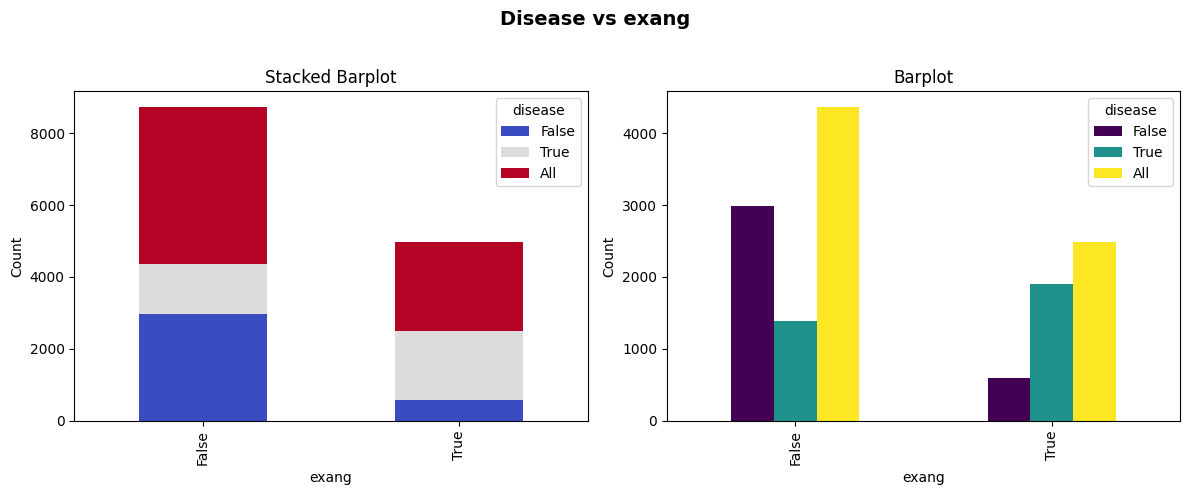

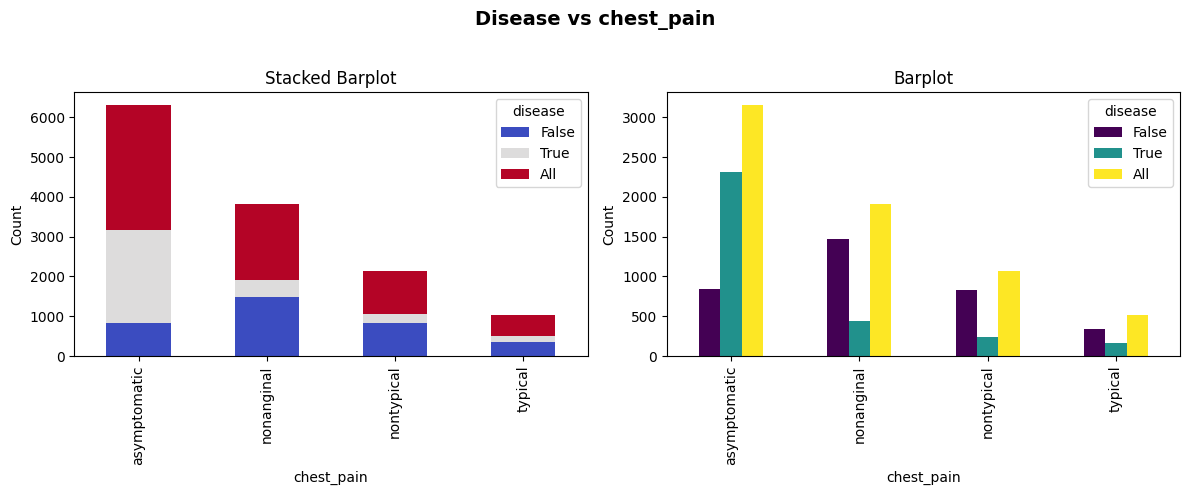

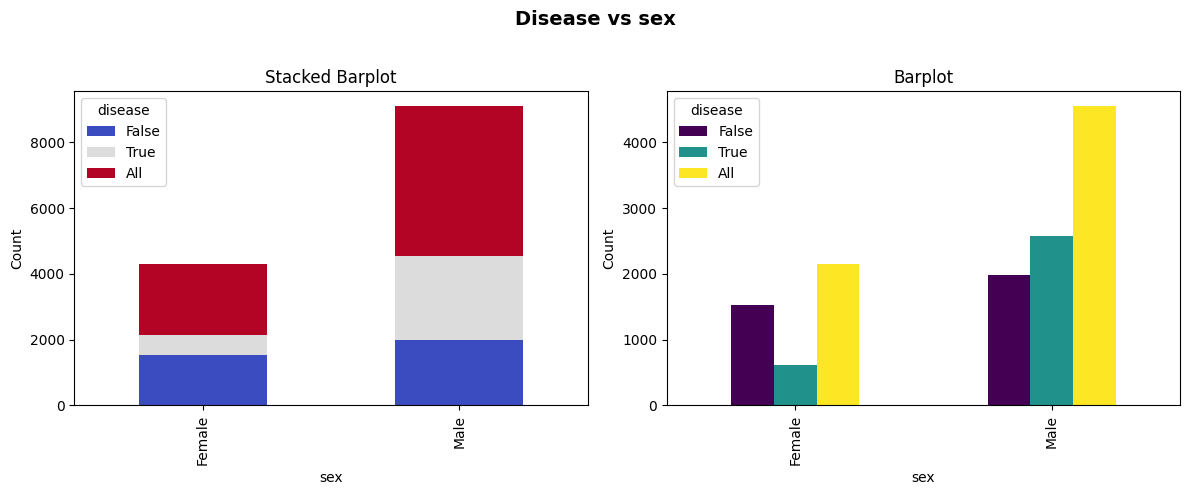

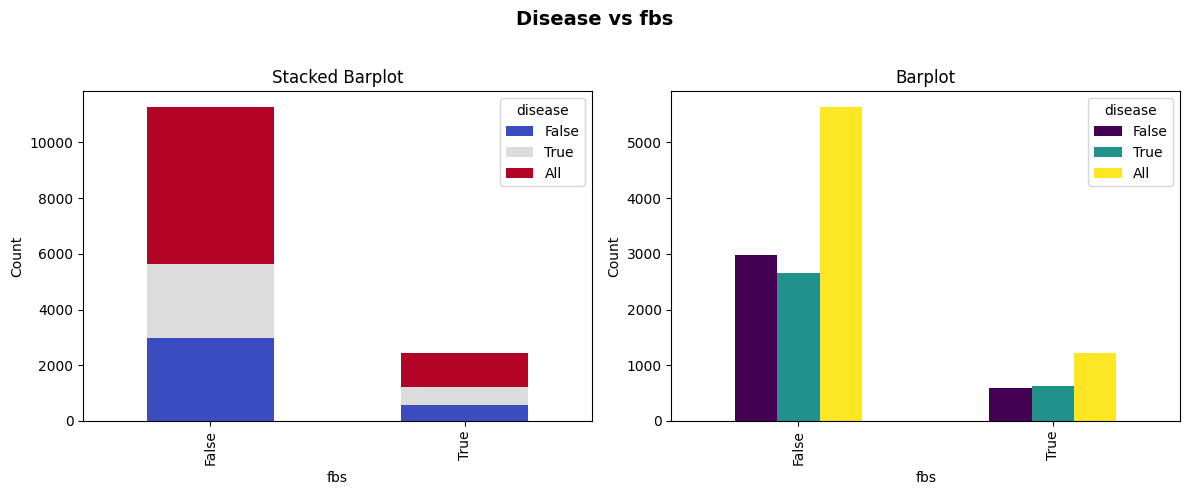

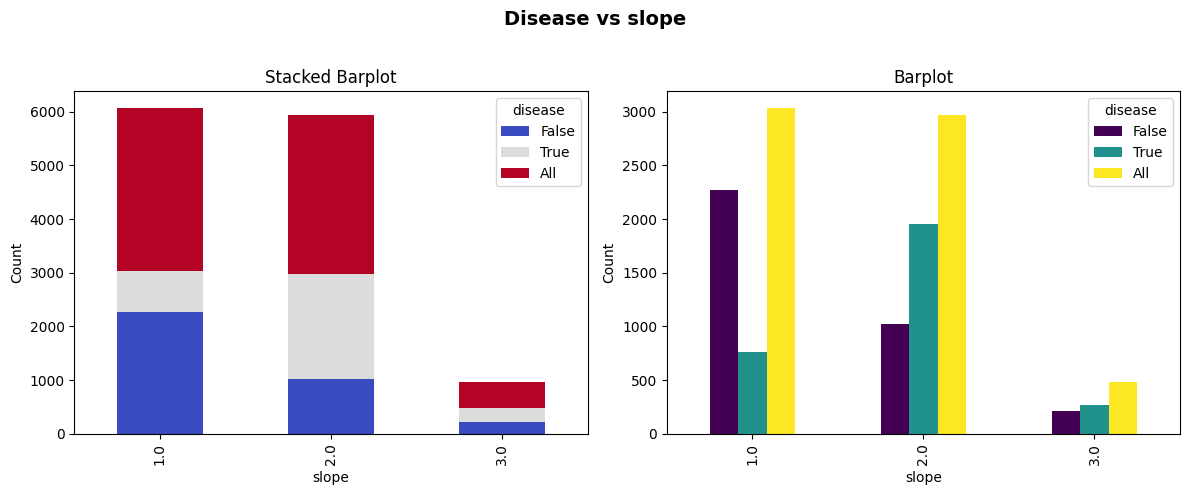

In [35]:
# Bivariate analysis for categorical columns
for col in [c for c in categorical_columns if c != "disease"]:
    bivariate_analysis_cat(col)

#### **Numerical vs Numerical Variables**

In [36]:
def bivariate_analysis_num_vs_num(target, numerical_columns):
    """
    Function to plot scatter plots of a numerical column against all other numerical columns.
    
    Parameters:
    - target_column: The numerical column to compare against others.
    - numerical_columns: List of numerical column names.
    """

    nums = [col for col in numerical_columns if col != target]  # Exclude target column

    plt.figure(figsize=(18, len(nums)))  # Dynamic figure size based on number of comparisons
    plt.suptitle(f"{target} vs Other Numerical Variables", fontsize=14, fontweight="bold")

    for i, col in enumerate(nums, 1):
        plt.subplot(1, len(nums), i)
        hd_df.plot(kind="scatter", x=target, y=col, title=f"{target} vs {col}", ax=plt.gca())

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
    plt.show()

    return None


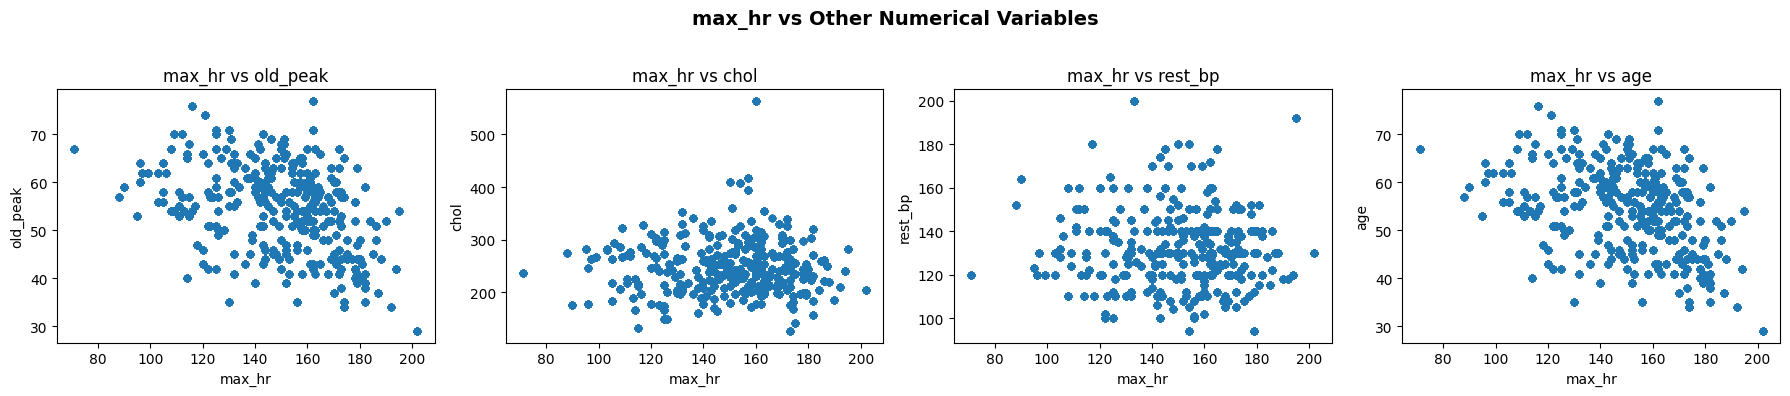

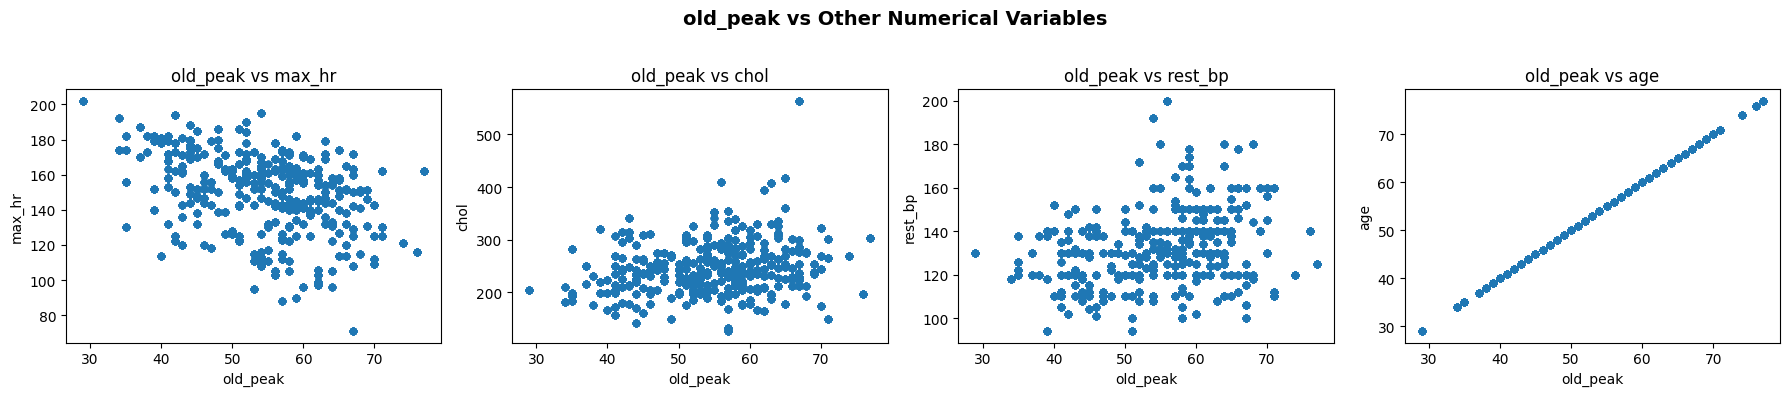

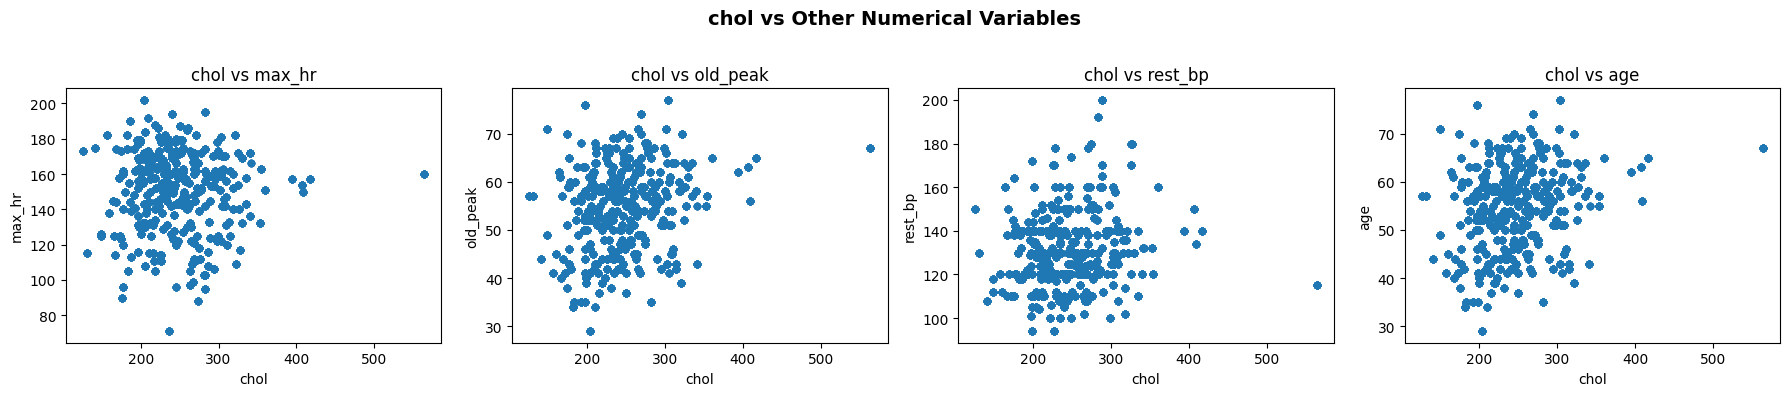

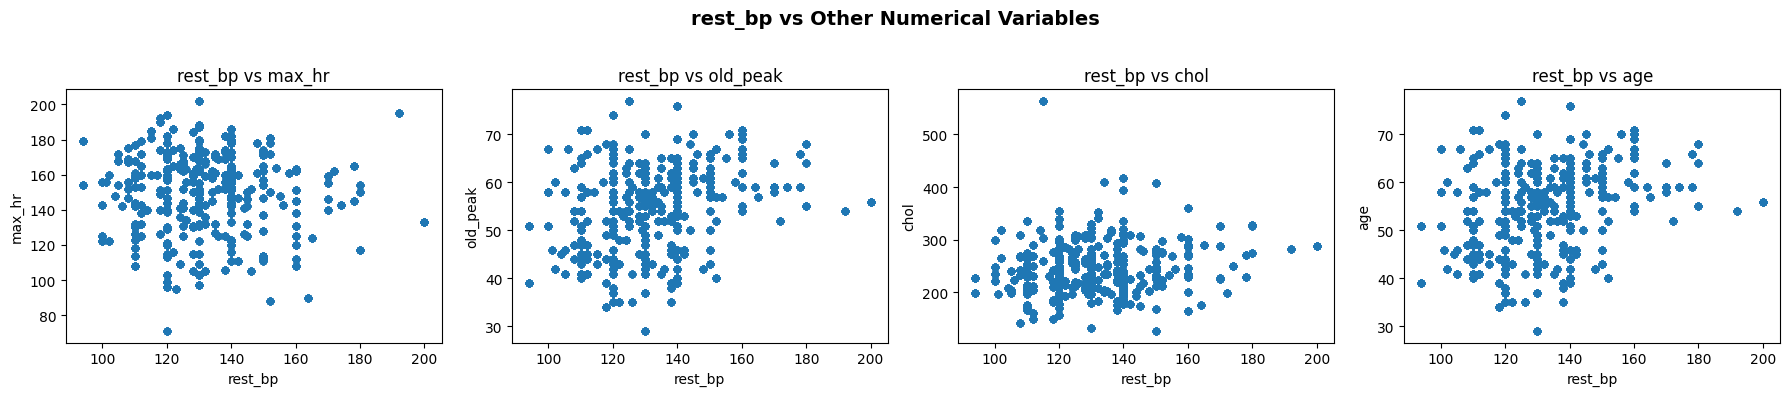

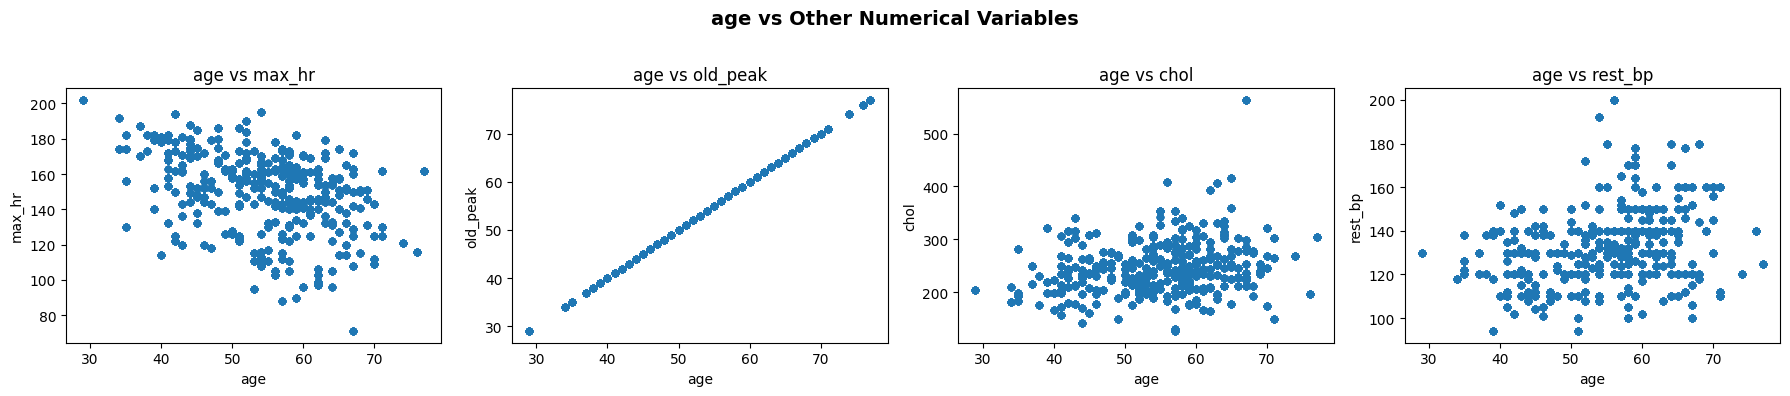

In [37]:
for col in numerical_columns:
    bivariate_analysis_num_vs_num(col, numerical_columns)

#### **Categorical vs Categorical Variables**

In [38]:
def bivariate_analysis_cat_vs_cat(target, categorical_columns):
    """
    Function to analyze relationships between a categorical column and all other categorical columns.
    
    Parameters:
    - target: The categorical column to compare against others.
    - categorical_columns: List of categorical column names.
    """

    cats = [col for col in categorical_columns if col != target]  # Exclude target column

    plt.figure(figsize=(5 * len(cats), 5))  # Dynamic figure size
    plt.suptitle(f"{target} vs Other Categorical Variables", fontsize=14, fontweight="bold")

    for i, col in enumerate(cats, 1):
        plt.subplot(1, len(cats), i)

        # Crosstab for stacked barplot
        cross_tab = pd.crosstab(hd_df[target], hd_df[col])
        cross_tab.plot(kind="bar", stacked=True, ax=plt.gca(), title=f"{target} vs {col} Stacked Barplot")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap
    plt.show()

    # Generate Crosstab Tables with Heatmap Styling
    for col in cats:
        display(
            pd.crosstab(hd_df[target], hd_df[col], margins=True)
            .style.background_gradient(cmap="coolwarm")
            .set_caption(f"{target} vs {col} Heatmap")
        )

    return None

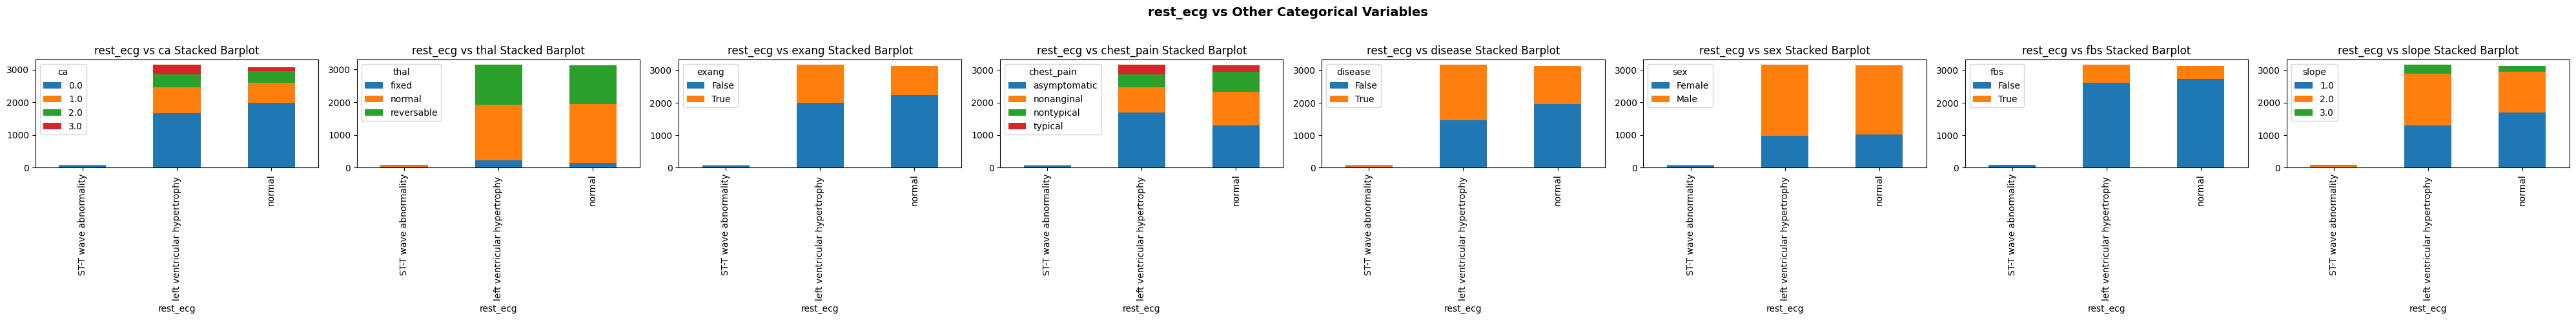

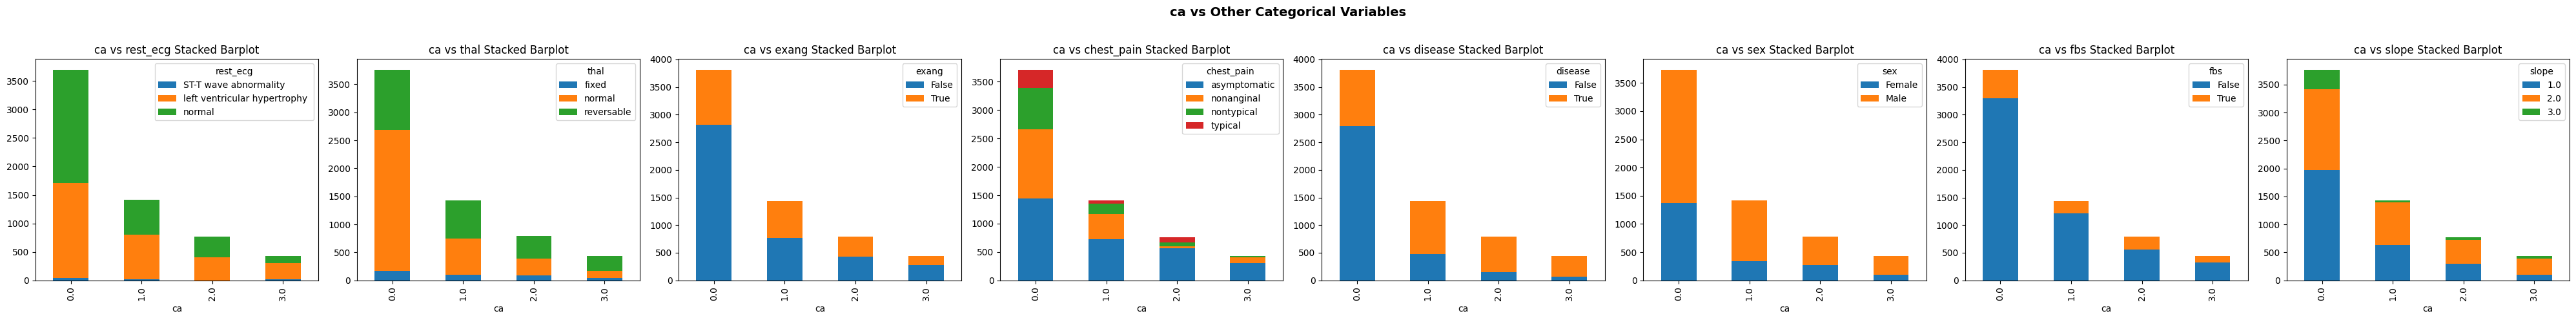

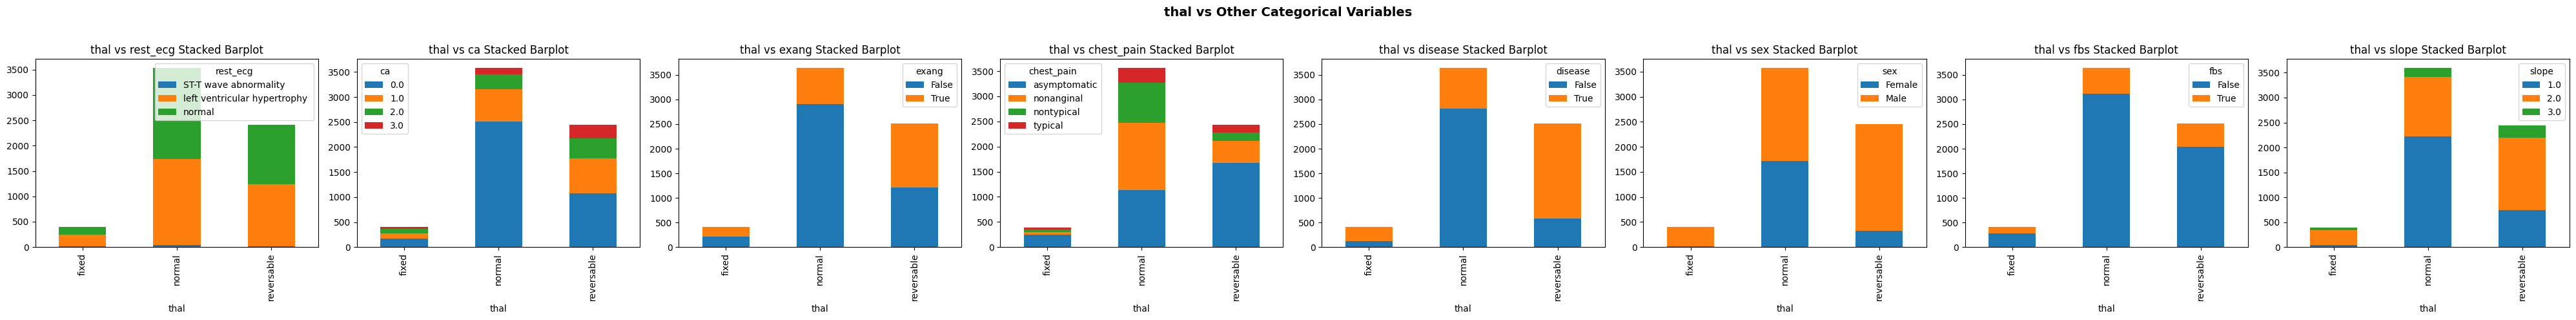

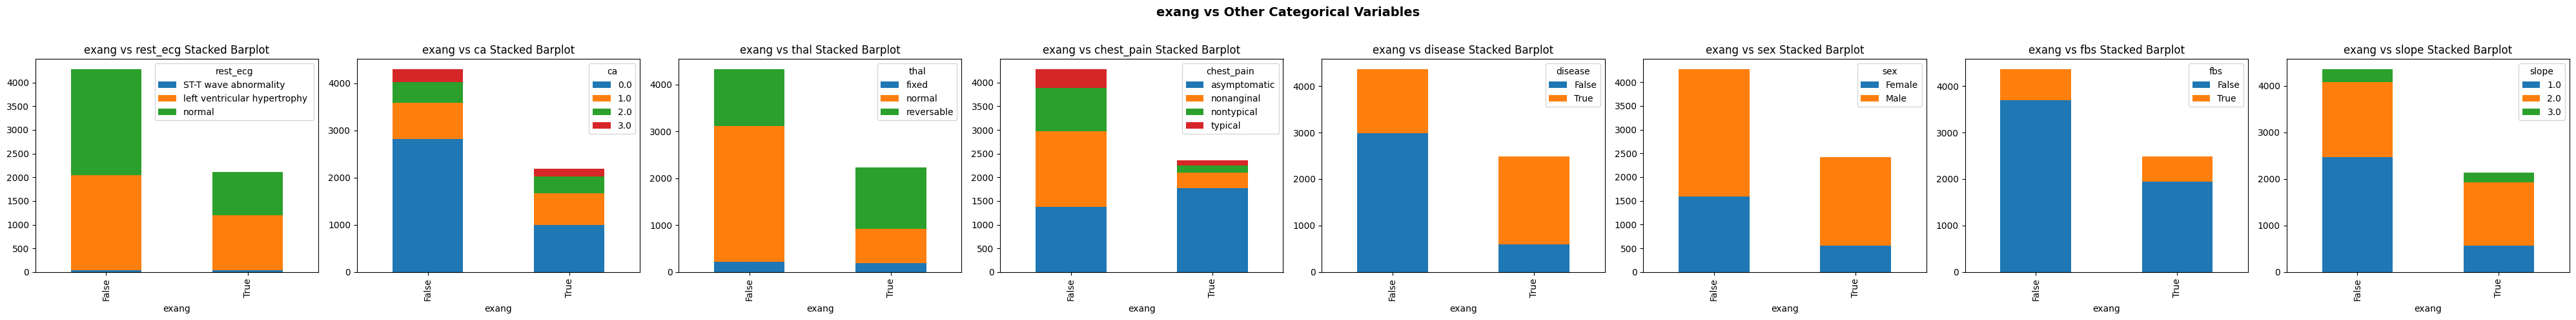

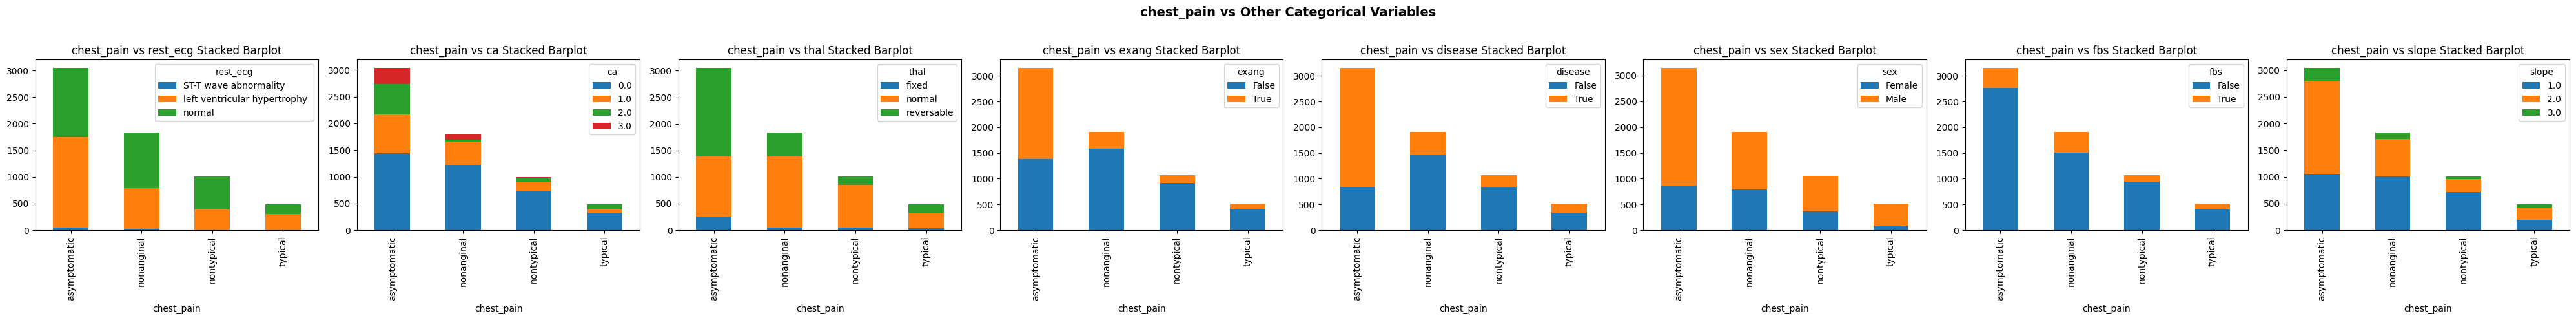

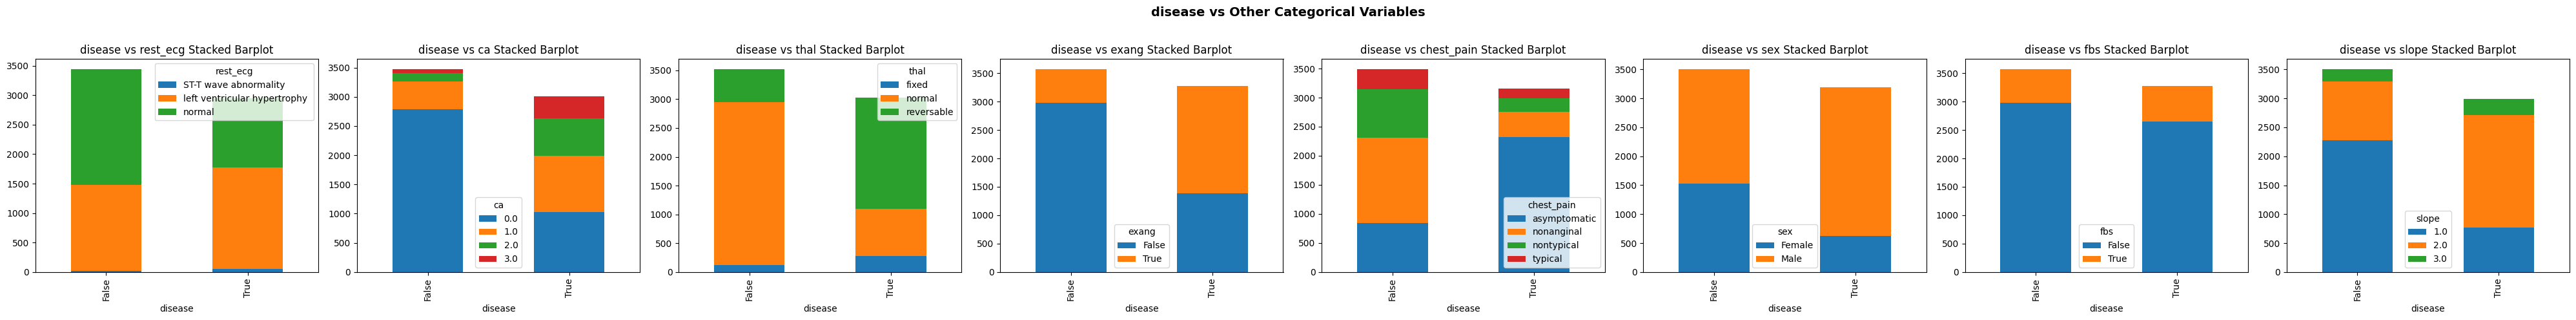

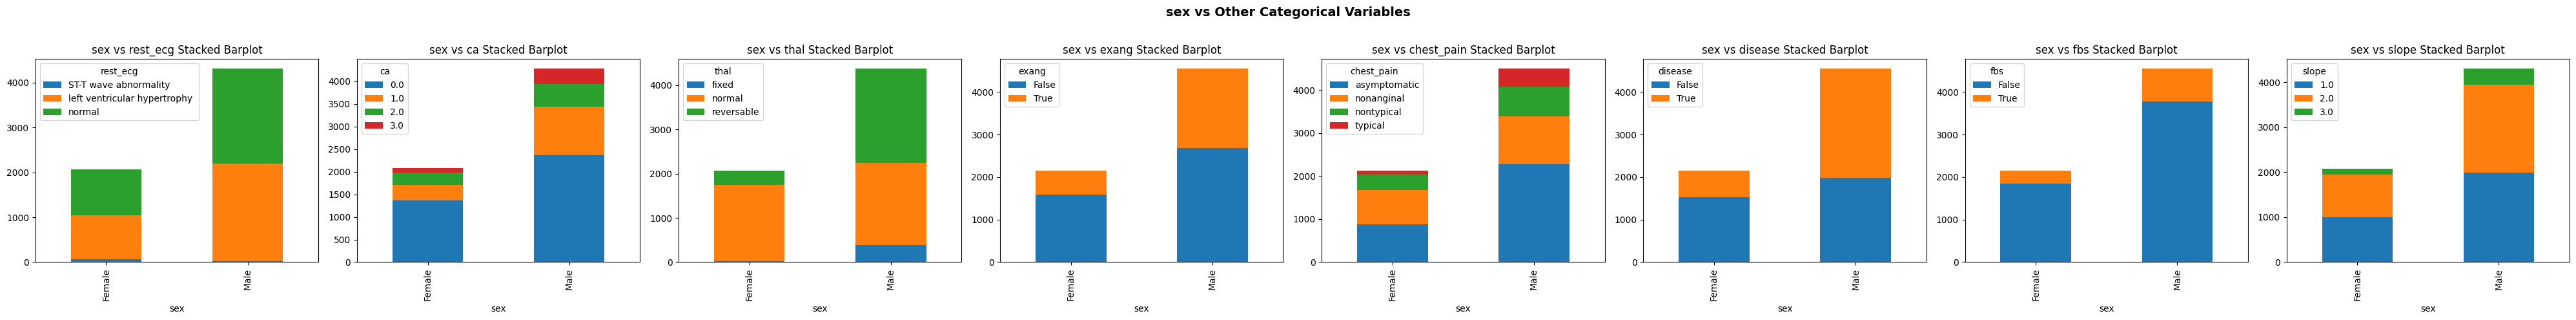

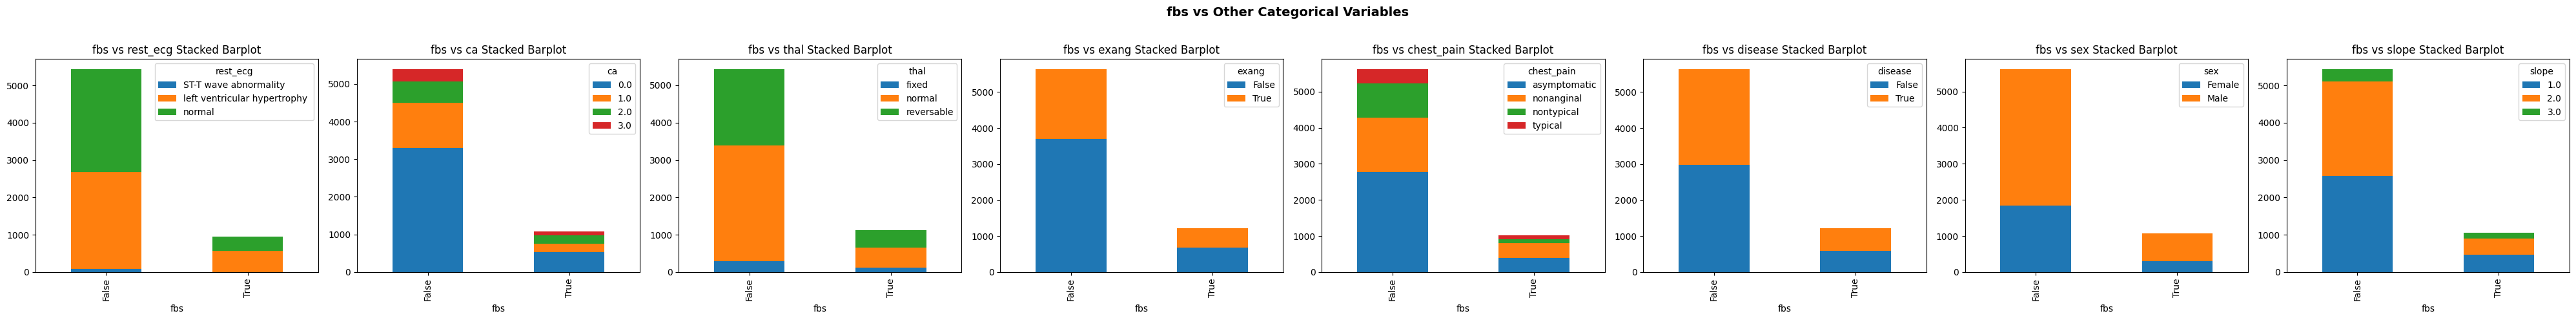

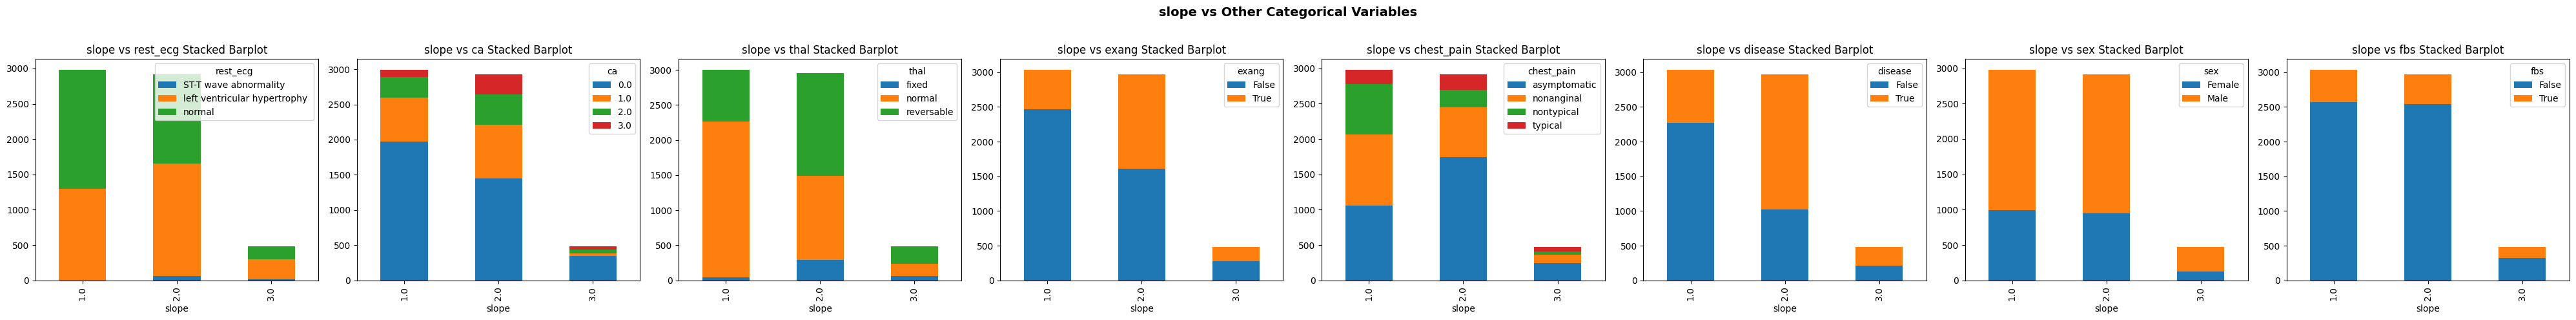

In [39]:
for col in categorical_columns:
    bivariate_analysis_cat_vs_cat(col, categorical_columns)


#### **Categorical vs Numerical Variables**

In [40]:
def bivariate_analysis_num_vs_cat(numerical_column, categorical_columns):
    """
    Function to plot bivariate analysis between a numerical column and multiple categorical columns.

    Parameters:
    - numerical_column: The numerical column to compare against categorical columns.
    - categorical_columns: List of categorical column names.
    """

    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 3)) 
        plt.suptitle(f"{numerical_column} vs {cat_col}", fontsize=12, fontweight="bold")

        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=hd_df[cat_col], y=hd_df[numerical_column])
        plt.title("Boxplot", fontsize=9)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(numerical_column, fontsize=9)

        # Barplot
        plt.subplot(1, 2, 2)
        sns.barplot(
            data=hd_df,
            x=cat_col,
            y=numerical_column,
            errorbar="ci",
            capsize=0.05,
            hue=cat_col,
            palette="coolwarm",
        )
        plt.title("Barplot", fontsize=10)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(numerical_column, fontsize=9)
        plt.legend(fontsize=5)

        # Adjust spacing to make it more compact
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        plt.show()

    return None


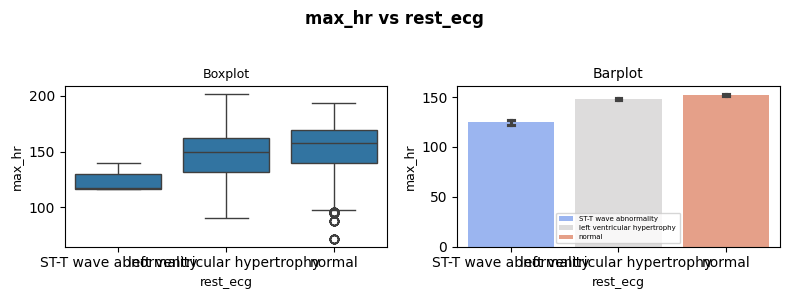

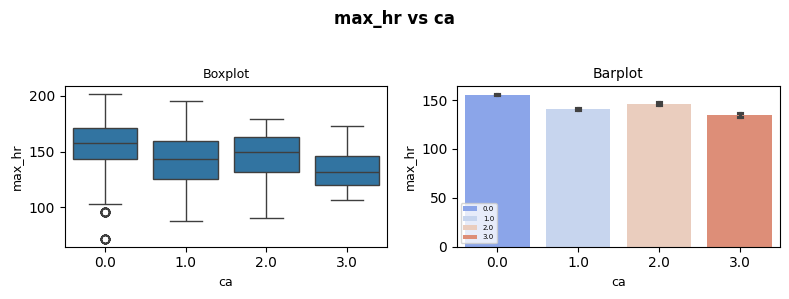

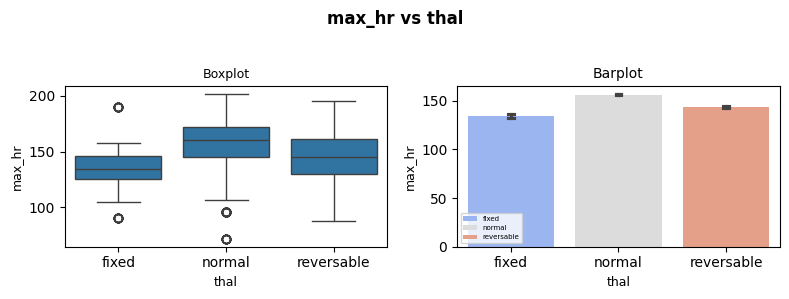

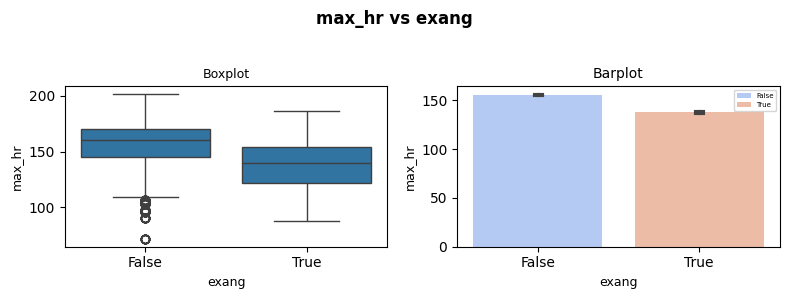

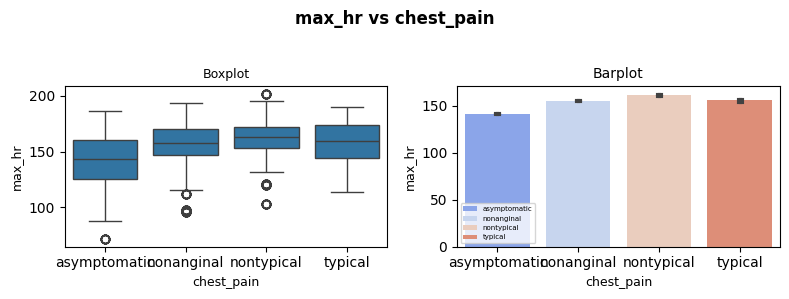

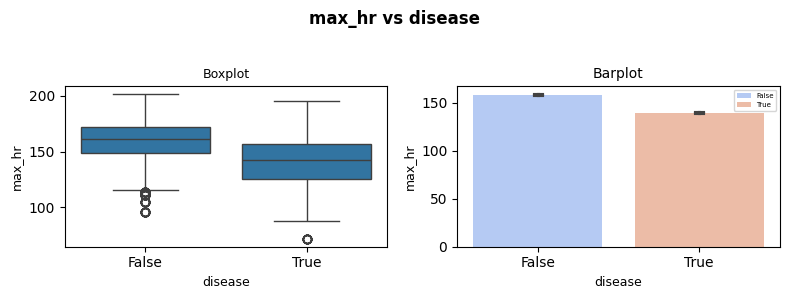

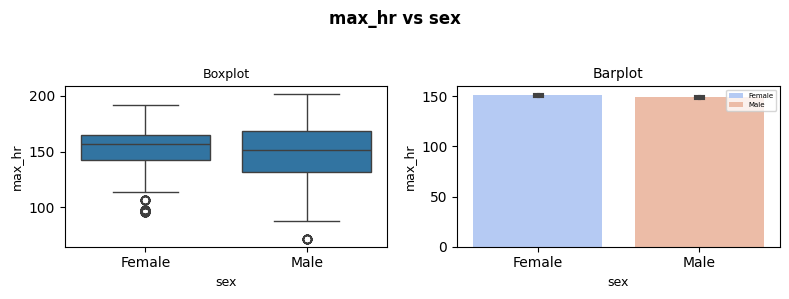

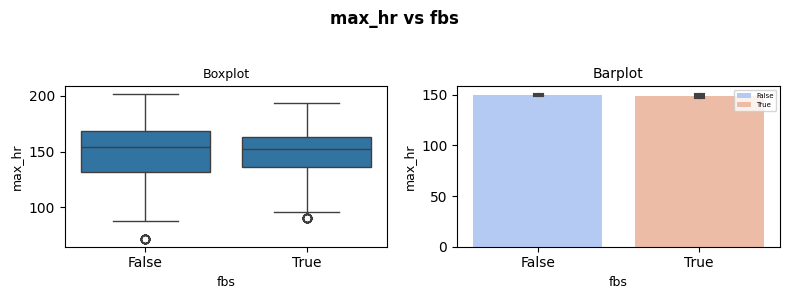

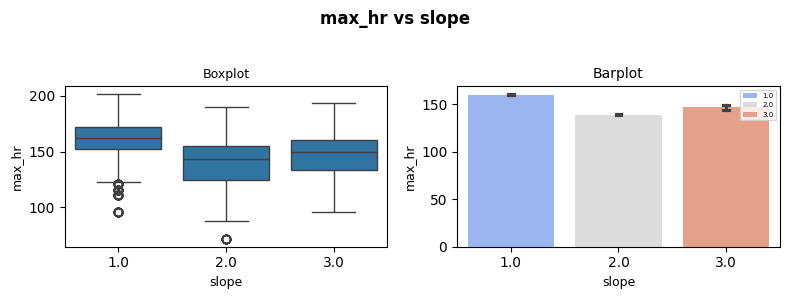

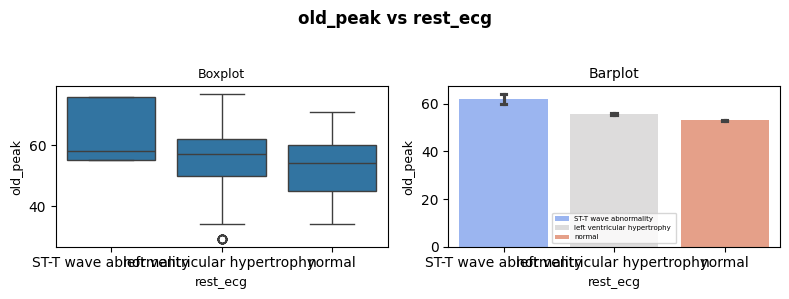

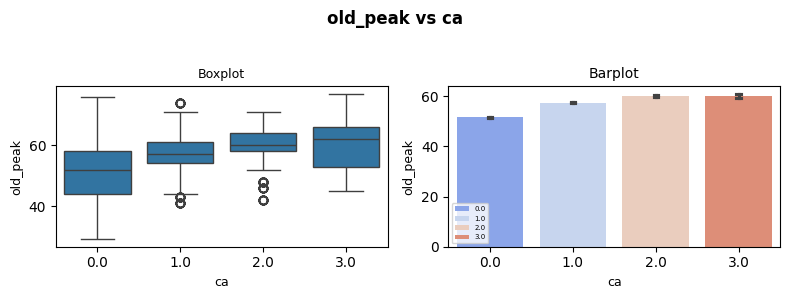

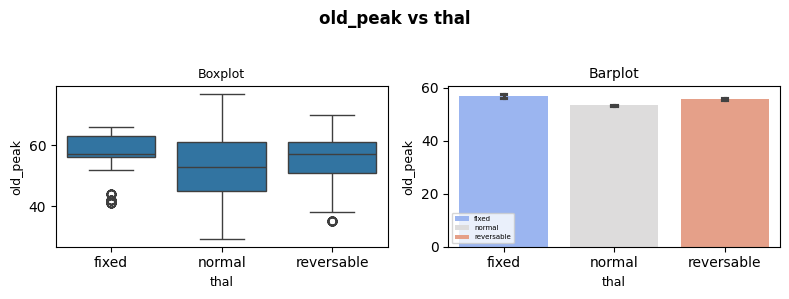

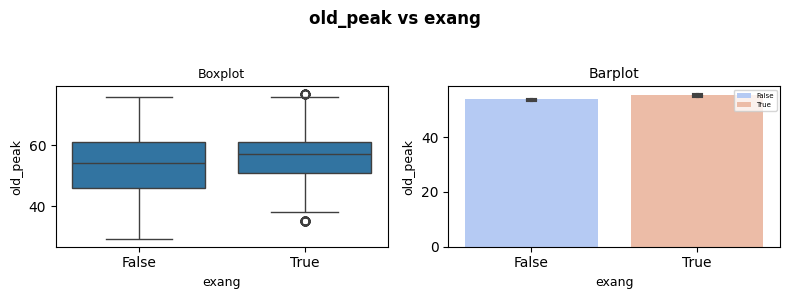

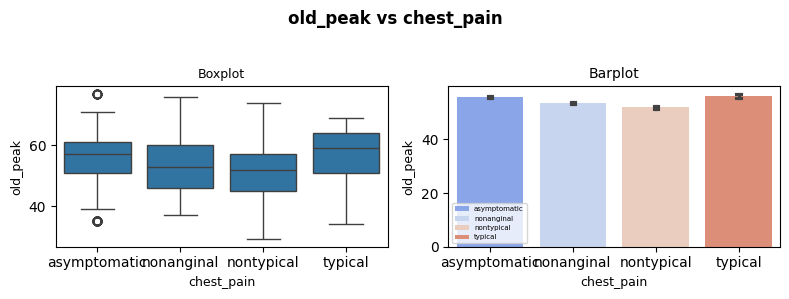

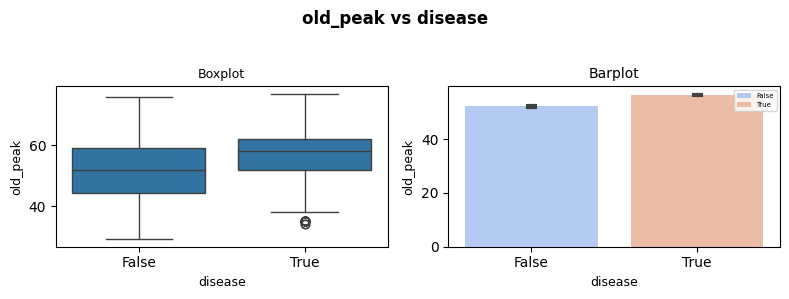

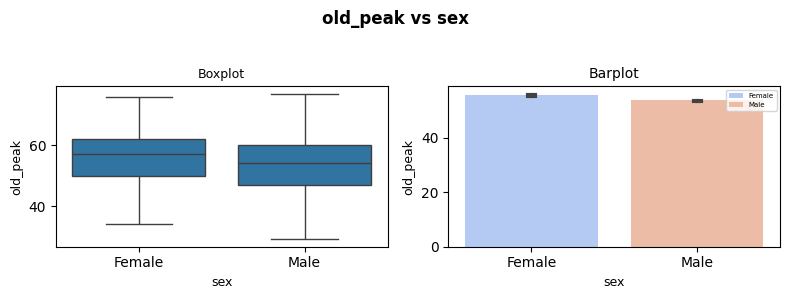

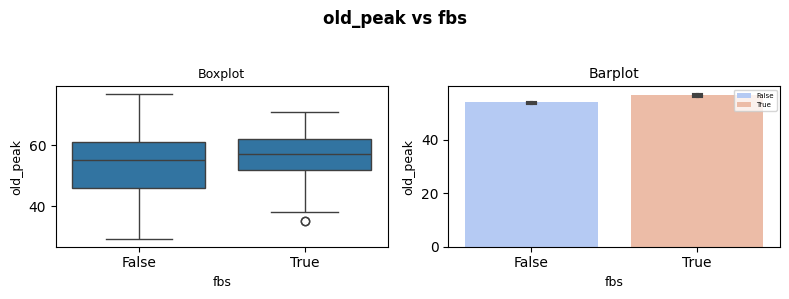

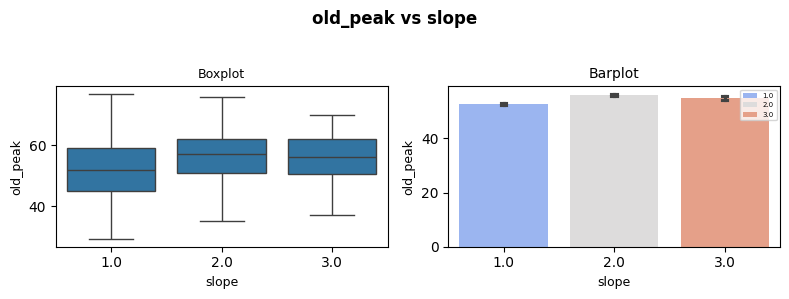

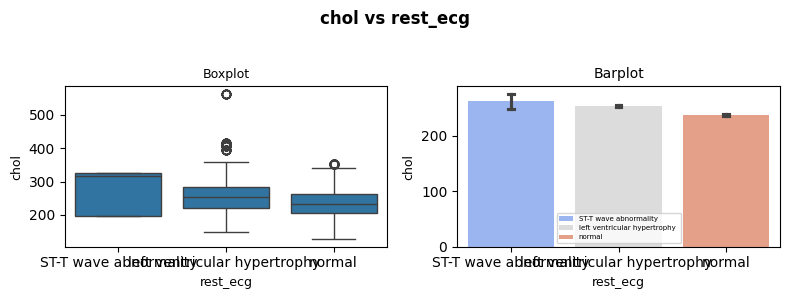

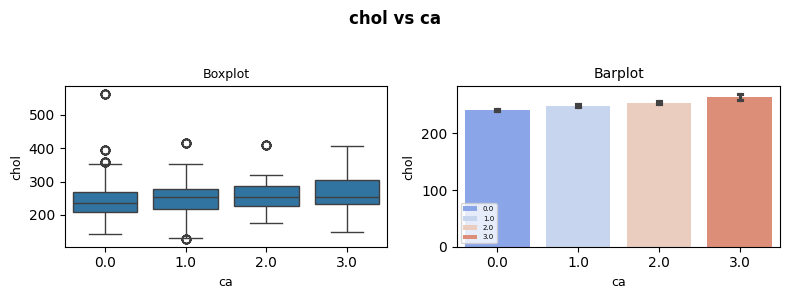

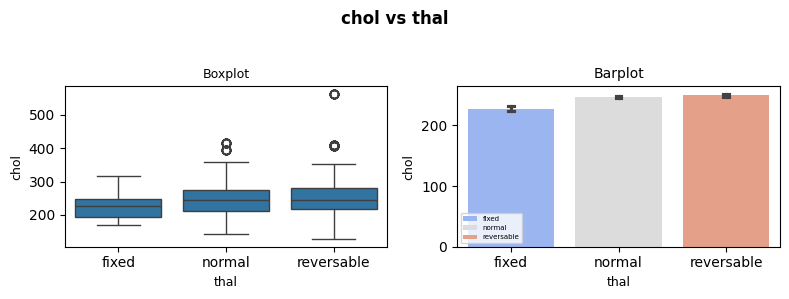

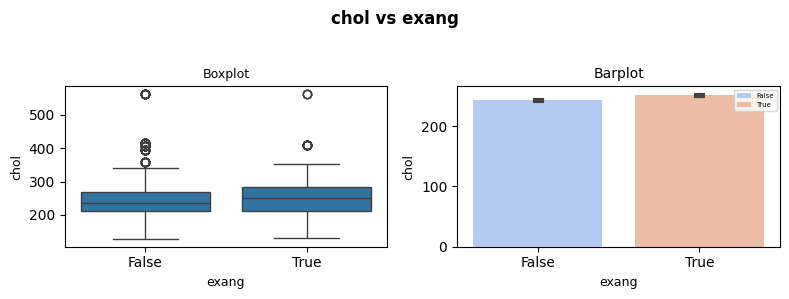

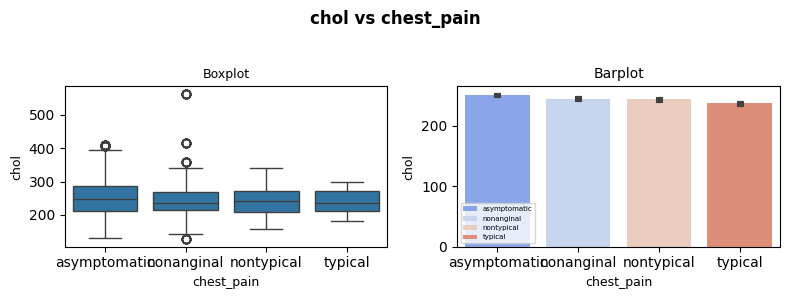

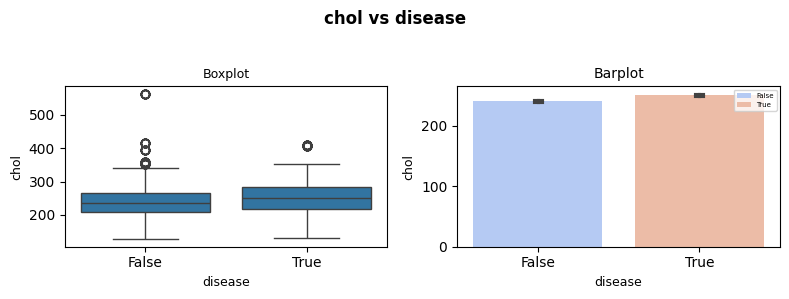

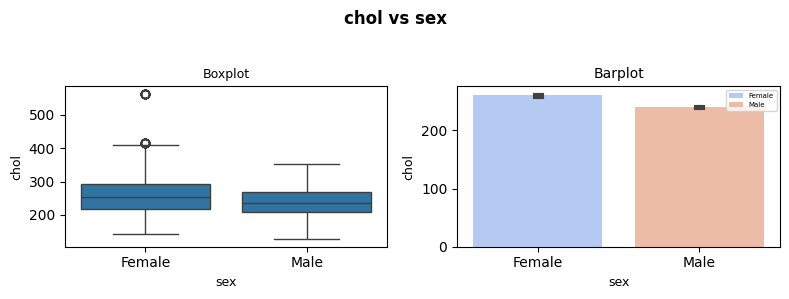

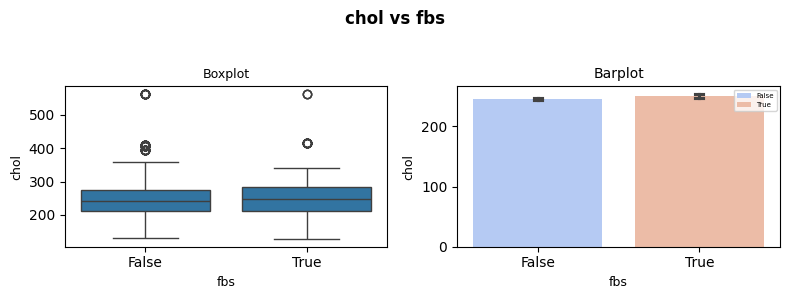

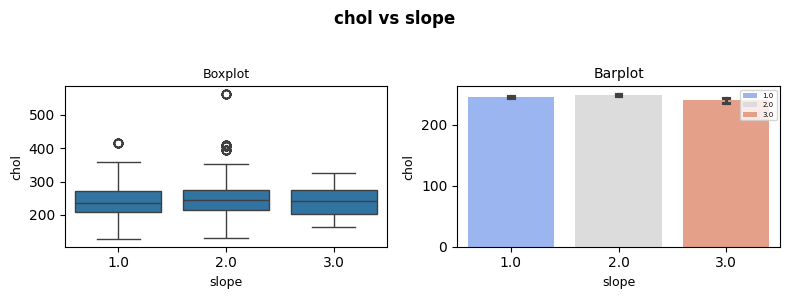

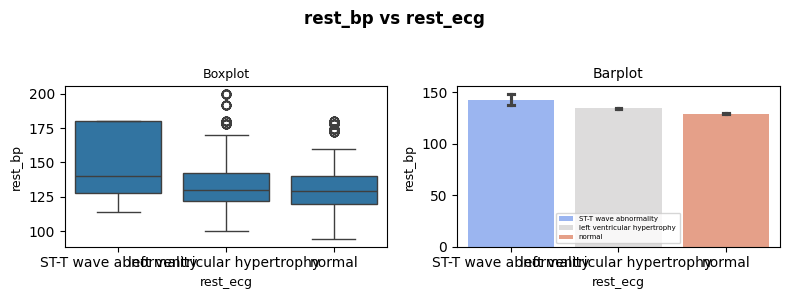

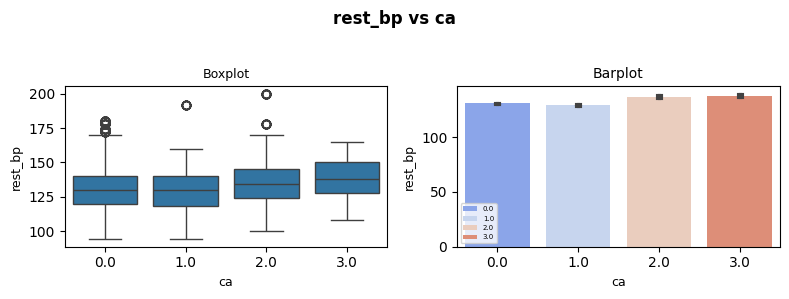

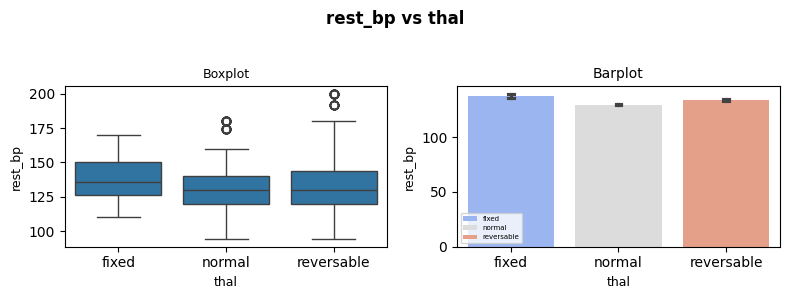

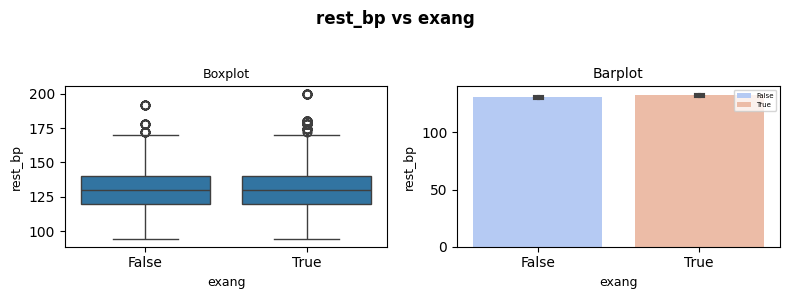

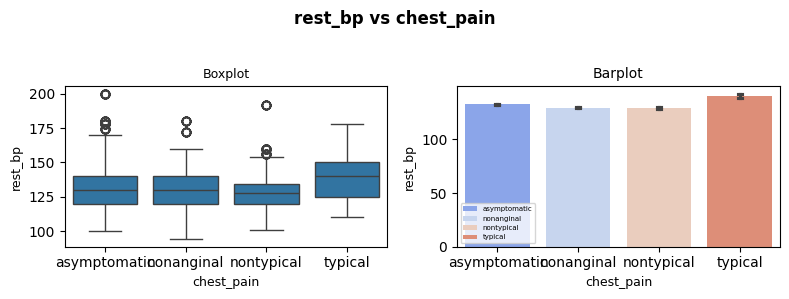

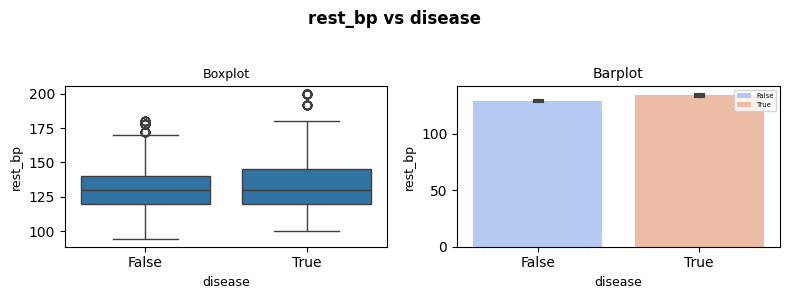

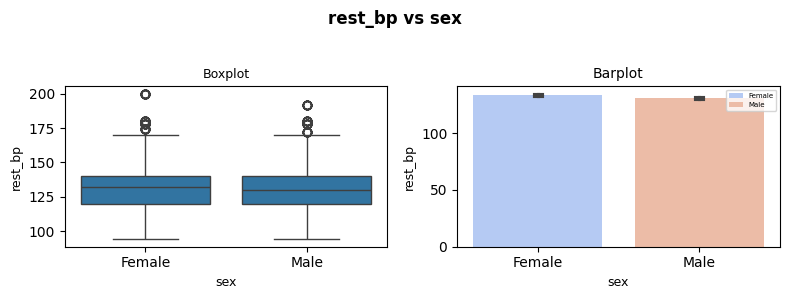

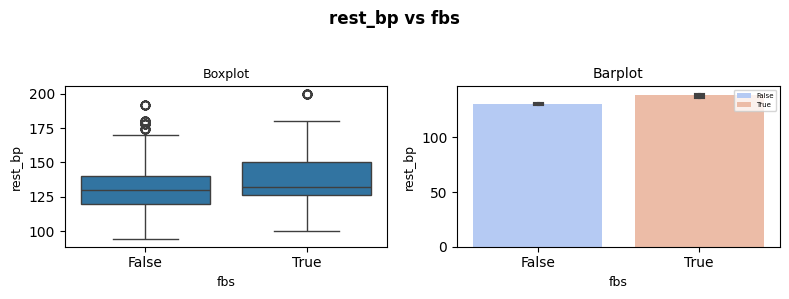

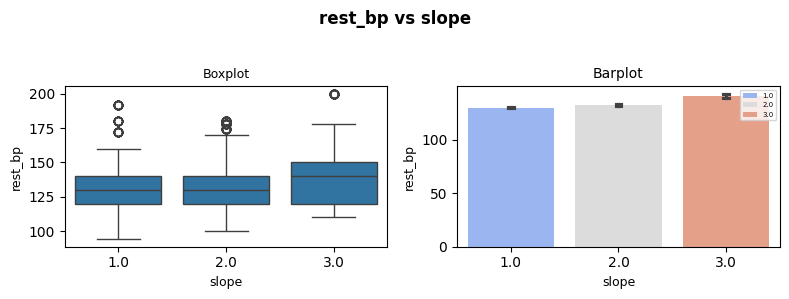

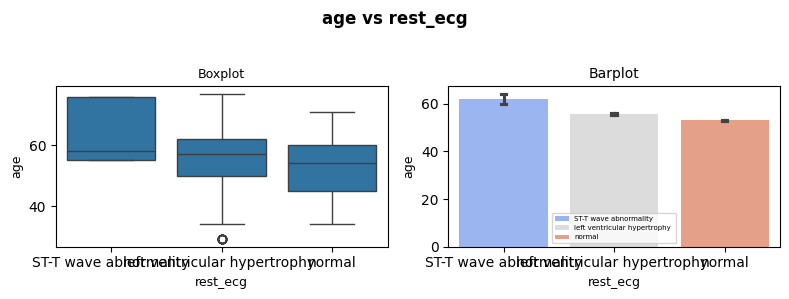

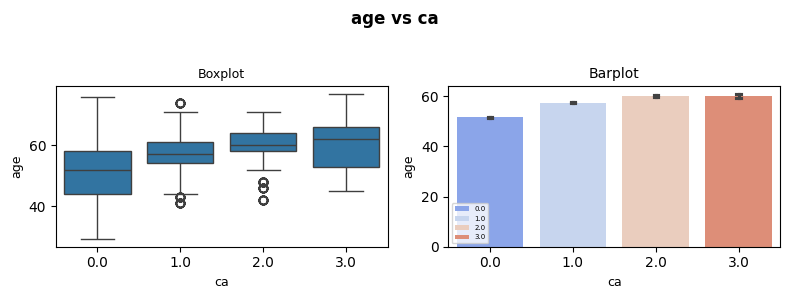

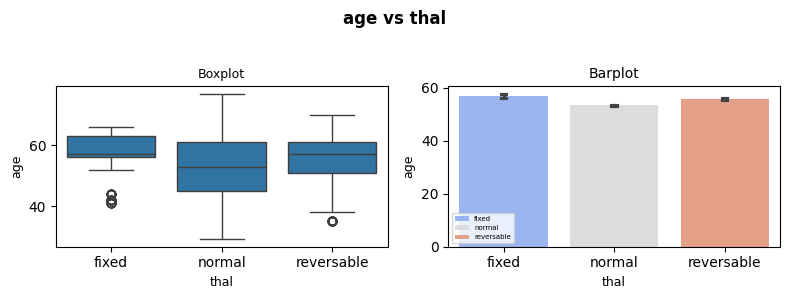

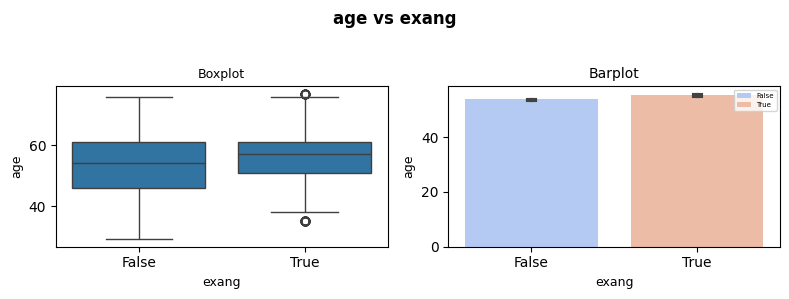

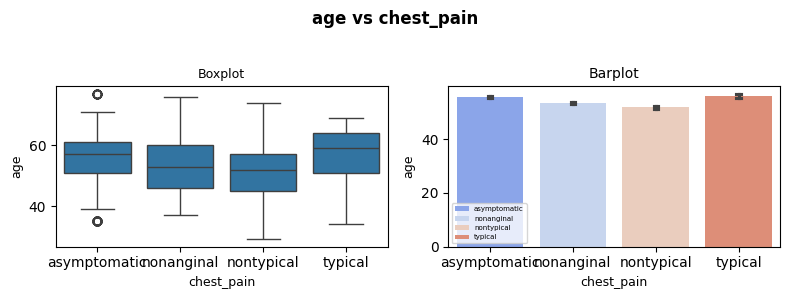

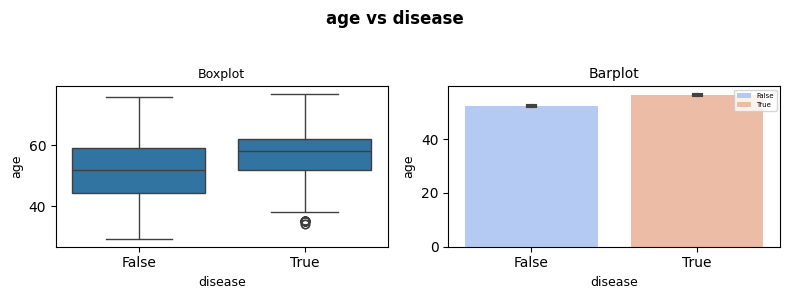

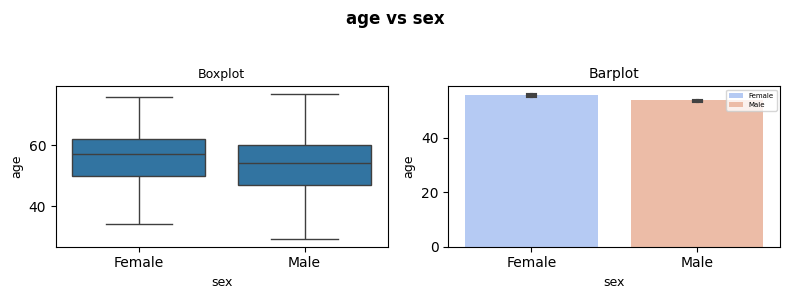

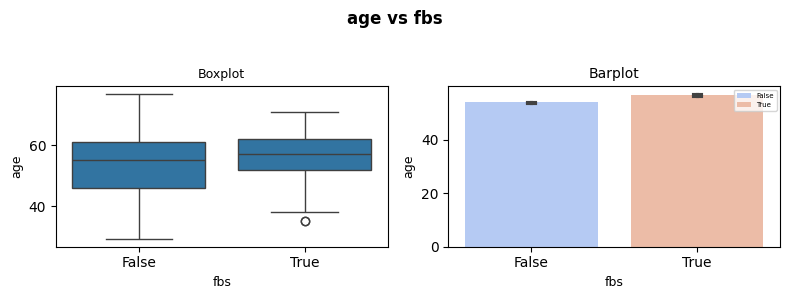

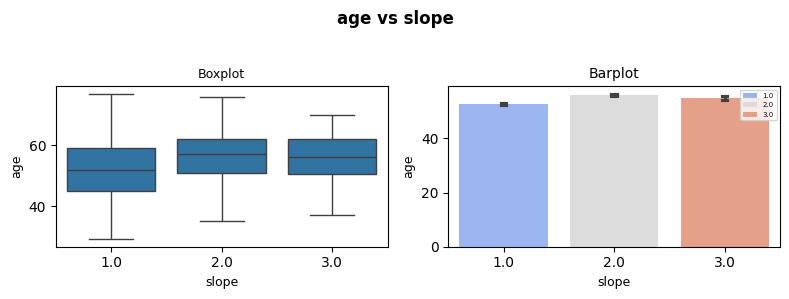

In [41]:
for num_col in numerical_columns:
    bivariate_analysis_num_vs_cat(num_col, categorical_columns)

### **5. Multivariate Analysis**

#### **Numerical vs All Numerical Variables**

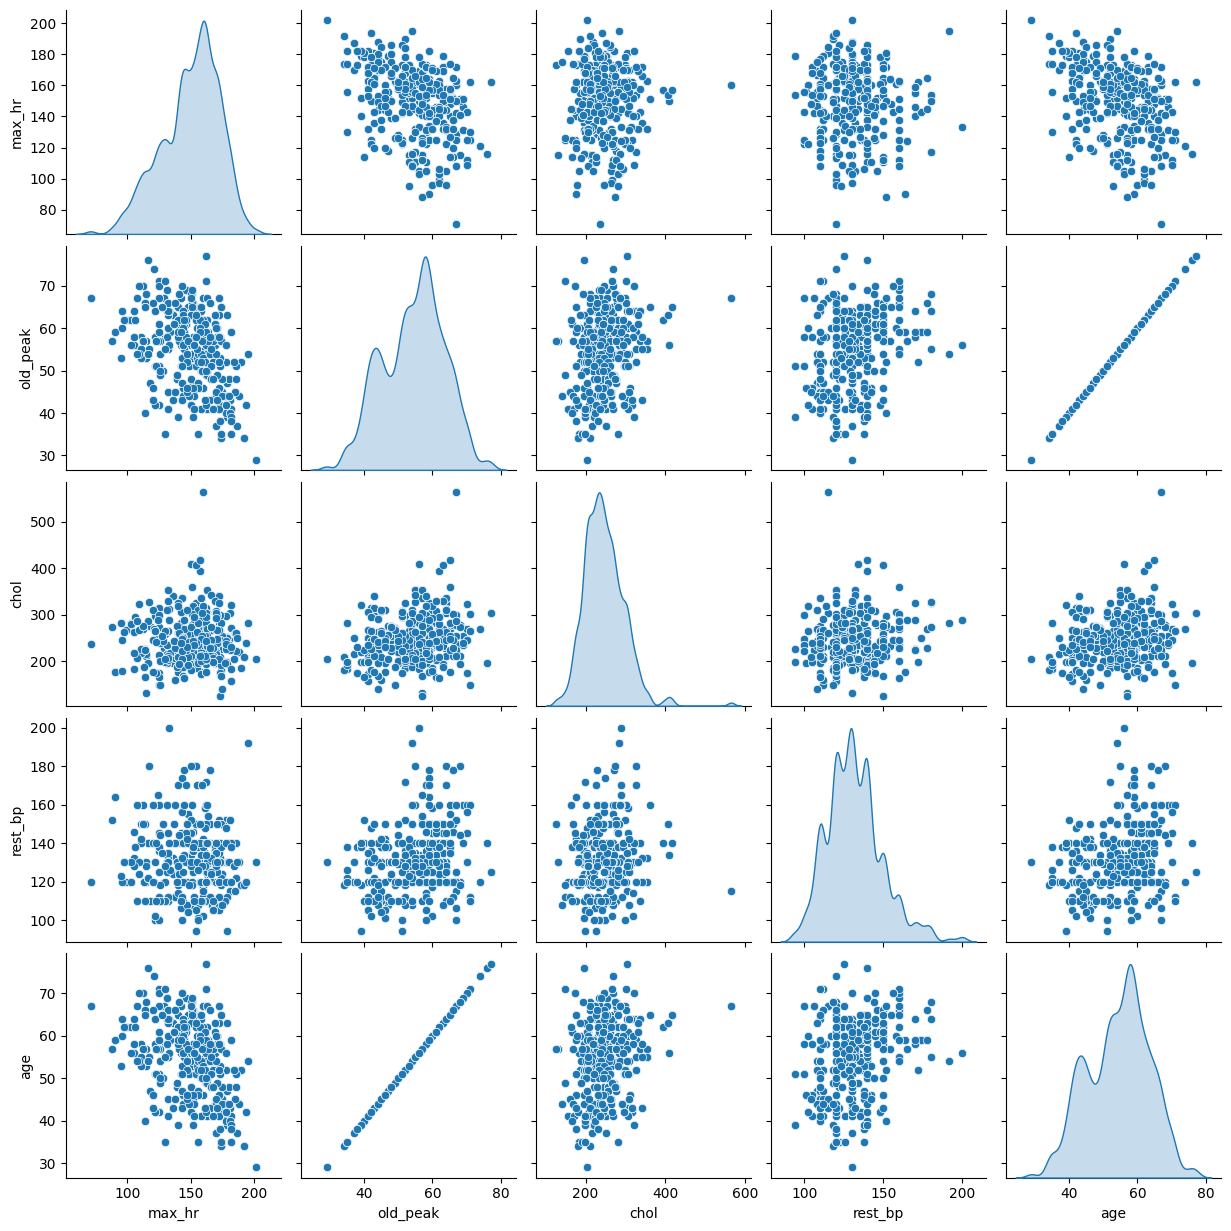

In [42]:
sns.pairplot(hd_df[numerical_columns], diag_kind="kde")

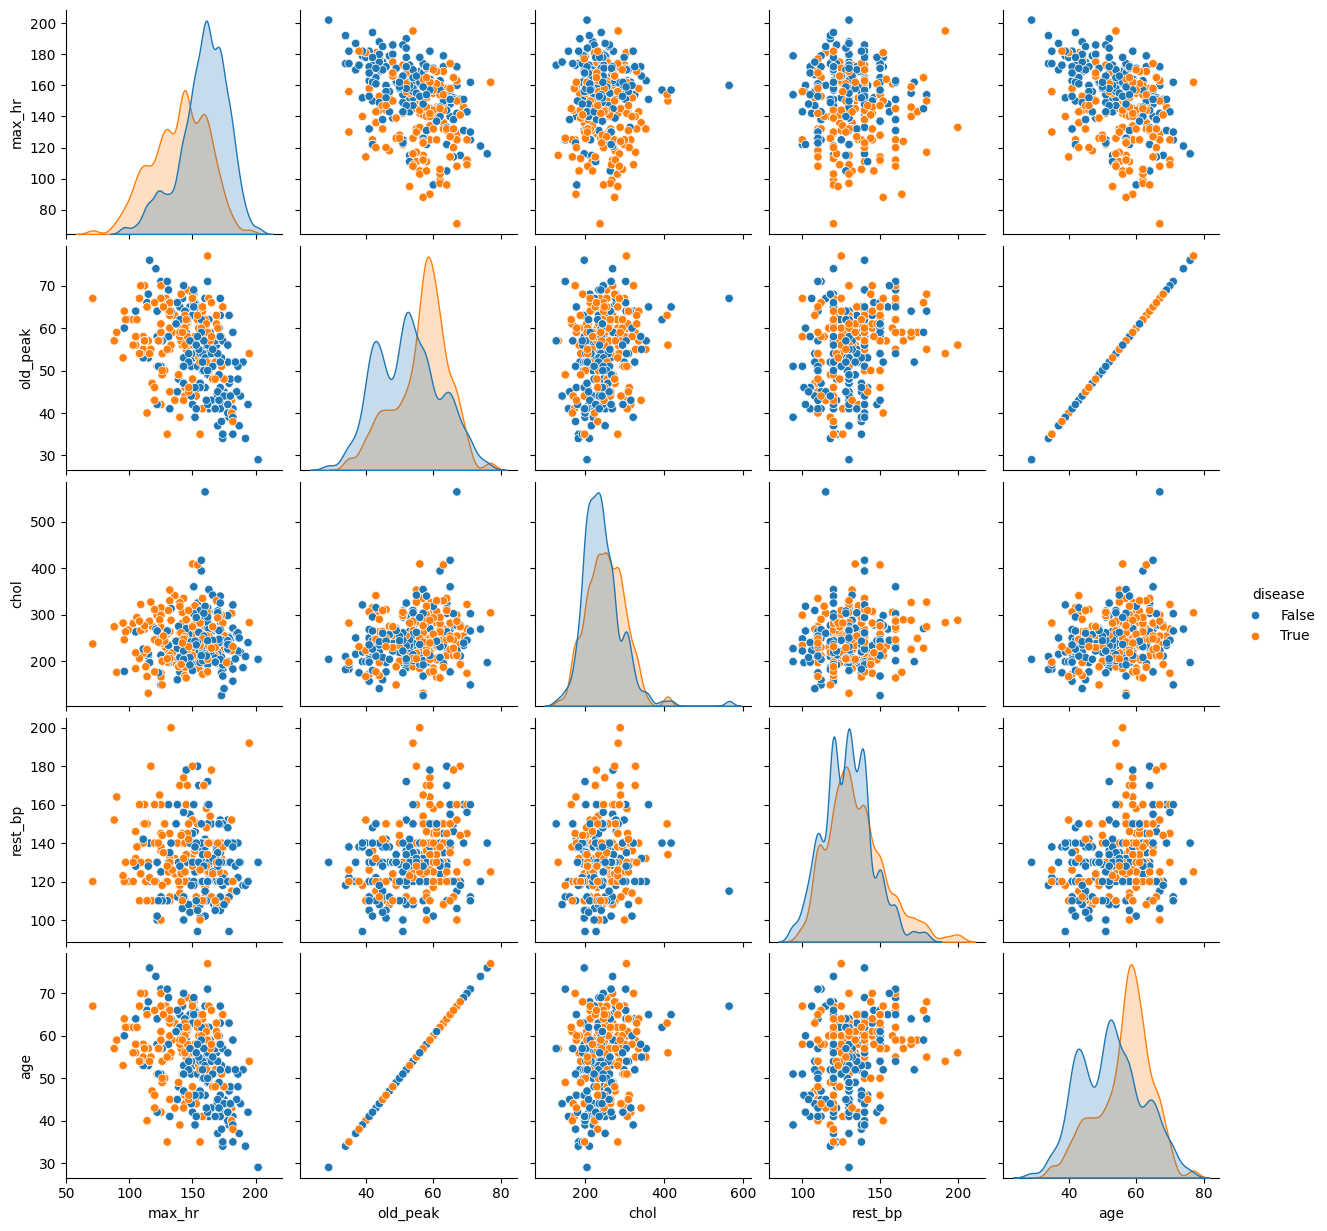

In [43]:
disease = hd_df[[*numerical_columns, "disease"]]
sns.pairplot(disease, hue="disease", diag_kind="kde")

### **6. Heuristics**

Watching and analyzing the results after experimenting with the data and getting to know its correlations and tendences, I took some conclusions to make this heuristic model from the EDA analysis.

In [44]:
def heart_disease_risk(age: int, max_hr: int, chest_pain: str, thal: str, sex: str) -> int:
    """
    Heuristic model to determine heart disease risk.
    - Higher risk for ages between 50 and 60.
    - Higher risk if max_hr is between 120 and 160.
    - Higher risk if chest pain is asymptomatic.
    - Higher risk if thal is reversible defect.
    - Higher risk if sex is male.
    """
    risk_factors = 0
    
    if 50 <= age <= 60:
        risk_factors += 1
    if 120 <= max_hr <= 160:
        risk_factors += 1
    if chest_pain == "asymptomatic":
        risk_factors += 2
    if thal == "reversible":
        risk_factors += 1
    if sex == "male":
        risk_factors += 1
    
    return 1 if risk_factors >= 3 else 0

In [45]:
# Apply heuristic model
test = hd_df.copy()
test.dropna(inplace=True)

test["heuristic_risk"] = test.apply(
    lambda row: heart_disease_risk(
        row["age"], row["max_hr"], row["chest_pain"], row["thal"], row["sex"]
    ),
    axis=1
)

In [46]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

y_true, y_pred = test["disease"], test["heuristic_risk"]
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=["No Disease", "Disease"]))

Accuracy: 0.7244516653127538
              precision    recall  f1-score   support

  No Disease       0.71      0.82      0.76      3301
     Disease       0.74      0.62      0.68      2854

    accuracy                           0.72      6155
   macro avg       0.73      0.72      0.72      6155
weighted avg       0.73      0.72      0.72      6155



The heuristic model has **72.4% accuracy**, with a recall of 62% for "Disease" and 82% for "No Disease." This means the model captures significantly more actual disease cases while still maintaining good performance for predicting no disease. The most influential factor is **asymptomatic chest pain**, which has a strong impact on heart disease prediction. Other key variables include age (50-60), max heart rate (120-160 bpm), thalassemia (reversible defect), and being male. While this is a simple model, its strong metrics confirm that my dataset insights and analysis are valid, though a more advanced approach could further improve performance.

### **7. Results and conclusions**

- The target variable is balanced, ensuring a fair distribution between disease and no-disease cases.

- Cholesterol (chol) values above 400 and resting blood pressure (rest_bp) values above 170 are outliers.

- The resting ECG category "ST-T wave abnormality" is imbalanced.

- Chest pain is predominantly asymptomatic, meaning most individuals do not report pain despite potential heart disease.

- There are more men than women in the dataset.

- Fasting blood sugar > 120 mg/dL is almost always false, suggesting it may not be a strong predictor.

- Slope category 3 has very few observations.

- Cholesterol (chol) and resting blood pressure (rest_bp) do not appear to significantly influence heart disease prediction.

- Heart disease is more likely to occur in individuals aged 50 to 60 years.

- Maximum heart rate (max_hr) between 120 and 160 is associated with a higher likelihood of heart disease.

- The presence of "thal reversible" (reversible thalassemia) is linked to a higher probability of heart disease.

- Asymptomatic chest pain has a 73.42% influence on heart disease prediction, making it a critical factor.

- Heart disease is more common in men (56.53%).

- Old peak (ST depression induced by exercise) is correlated with age.
